# Análisis de prueba de los proyectos de Dr. Snap!

## Extracción y limpieza de los datos del dataframe

Se carga el dataframe de prueba y se importan las librerías que se requieren para posteriormente hacer el análisis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (11, 6)
#plt.style.use('fivethirtyeight')

In [2]:
df_dr_snap = pd.read_csv("results_snap_test.csv")
df_dr_snap. head()

,Project,Path,Level,Score,Average,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
0,108-balloons,/home/rcruiz/Downloads/prueba_snap/2127/212781...,Intermediate,2,2.125,0,3,2,3,3,2,1,3
1,Árvore recursiva grande,/home/rcruiz/Downloads/prueba_snap/2090/209028...,Basic,1,1.000,0,0,1,3,0,2,1,1
2,Chiste-Worlds-funniest-joke,/home/rcruiz/Downloads/prueba_snap/2085/208553...,Intermediate,2,1.625,0,2,2,2,3,2,1,1
3,U1L1-ClickAlanzo,/home/rcruiz/Downloads/prueba_snap/2059/205936...,Basic,1,1.250,0,1,2,1,1,2,2,1
4,WebAssembly_FastForward,/home/rcruiz/Downloads/prueba_snap/2097/209714...,Intermediate,2,2.125,3,1,2,2,2,3,2,2


Se observa como son las 5 primeras filas del dataframe. Para cada proyecto de Dr. Snap analizado se especifica su ruta absoluta, el nivel alcanzado en el proyecto, que depende de la puntuación asignada por redondeo de la media de las 8 dimensiones consideradas a la hora de evaluar el pensamiento computacional. Estas 8 competencias son: uso de condicionales, sincronismo, flujo de control, abstracción, paralelismo, diversidad, interactividad con el usuario y datos. Estas variables son discretas y toman valores de 0, 1, 2 o 3.

La muestra cuenta con 284 proyectos de Dr. Snap y 12 variables o columnas, además de la correspondiente al nombre de  los proyectos.

In [3]:
df_dr_snap.shape

(284, 13)

In [4]:
df_dr_snap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Project             284 non-null    object 
 1   Path                284 non-null    object 
 2   Level               284 non-null    object 
 3   Score               284 non-null    int64  
 4   Average             284 non-null    float64
 5   Conditional         284 non-null    int64  
 6   Synchronization     284 non-null    int64  
 7   Flow Control        284 non-null    int64  
 8   Abstraction         284 non-null    int64  
 9   Parallelism         284 non-null    int64  
 10  Diversity           284 non-null    int64  
 11  User Interactivity  284 non-null    int64  
 12  Data                284 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 29.0+ KB


In [5]:
df_dr_snap["Level"] = pd.Categorical(df_dr_snap["Level"])
list_col_to_int = ['Score', 'Conditional', 'Synchronization', 'Flow Control', 'Abstraction', 'Parallelism',
                   'Diversity', 'User Interactivity', 'Data']
for column in list_col_to_int:
    df_dr_snap[column] = df_dr_snap[column].astype(np.uint8)
df_dr_snap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Project             284 non-null    object  
 1   Path                284 non-null    object  
 2   Level               284 non-null    category
 3   Score               284 non-null    uint8   
 4   Average             284 non-null    float64 
 5   Conditional         284 non-null    uint8   
 6   Synchronization     284 non-null    uint8   
 7   Flow Control        284 non-null    uint8   
 8   Abstraction         284 non-null    uint8   
 9   Parallelism         284 non-null    uint8   
 10  Diversity           284 non-null    uint8   
 11  User Interactivity  284 non-null    uint8   
 12  Data                284 non-null    uint8   
dtypes: category(1), float64(1), object(2), uint8(9)
memory usage: 9.8+ KB


El nivel obtenido en cada proyecto, se agrupa en 4 categorías en función de la puntuación asignada o "Score". Estas categorías son: no level, basic, intermediate y advanced.

Se realiza otra transformación pasando las variables de tipo entero a enteros sin signo de 8 bits, para que ocupe menos el dataframe.

In [6]:
df_dr_snap.describe(include=object)


,Project,Path
count,284,284
unique,248,284
top,U5L3-Data-Processing,/home/rcruiz/Downloads/prueba_snap/2165/216539...
freq,7,1


En la muestra hay 248 proyectos con un nombre único y existe un proyecto o dato que sería la moda de la muestra, al ser el más frecuente, pues se repite 7 veces. Sin embargo todos los proyectos tienen un path único.

In [7]:
df_dr_snap[df_dr_snap["Project"] == "U5L3-Data-Processing"]

,Project,Path,Level,Score,Average,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
29,U5L3-Data-Processing,/home/rcruiz/Downloads/prueba_snap/9292/929280...,Basic,1,1.125,0,0,1,3,0,2,0,3
82,U5L3-Data-Processing,/home/rcruiz/Downloads/prueba_snap/9292/929245...,Intermediate,2,1.500,3,0,1,3,0,2,0,3
89,U5L3-Data-Processing,/home/rcruiz/Downloads/prueba_snap/9292/929221...,Basic,1,0.500,0,0,0,3,0,1,0,0
94,U5L3-Data-Processing,/home/rcruiz/Downloads/prueba_snap/9292/929258...,Basic,1,0.750,0,0,1,3,0,2,0,0
108,U5L3-Data-Processing,/home/rcruiz/Downloads/prueba_snap/9292/929273...,Basic,1,1.125,0,0,1,3,0,2,0,3
123,U5L3-Data-Processing,/home/rcruiz/Downloads/prueba_snap/9292/929256...,Basic,1,1.000,0,0,1,3,0,1,0,3
145,U5L3-Data-Processing,/home/rcruiz/Downloads/prueba_snap/9292/929253...,Basic,1,0.500,0,0,0,3,0,1,0,0


Se comprueba a continuación si hay algún proyecto sin nombre asignado o sin datos. En esta muestra tan pequeña todos los proyectos tienen un nombre asignado y puntuaciones conseguidas. 

In [8]:
df_dr_snap[df_dr_snap["Project"].isnull()]
# df_dr_snap.isnull().any(axis=1)
# df_dr_snap.loc[113726, "Project"]

,Project,Path,Level,Score,Average,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data


In [9]:
df_dr_snap[df_dr_snap.isna().any(axis=1)]

,Project,Path,Level,Score,Average,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data


## Análisis de los proyectos por nivel. Frecuencias de los proyectos sin nivel, con nivel básico, con nivel medio, con nivel avanzado.

Se compueba el nº de proyectos que cuentan con cada uno de los 4 niveles señalados y se representa de manera gráfica, para una mejor visualización.

In [10]:
dic_level = df_dr_snap["Level"].value_counts().to_dict()
dic_level

{'Basic': 129, 'Intermediate': 129, 'Advanced': 23, 'No level': 3}

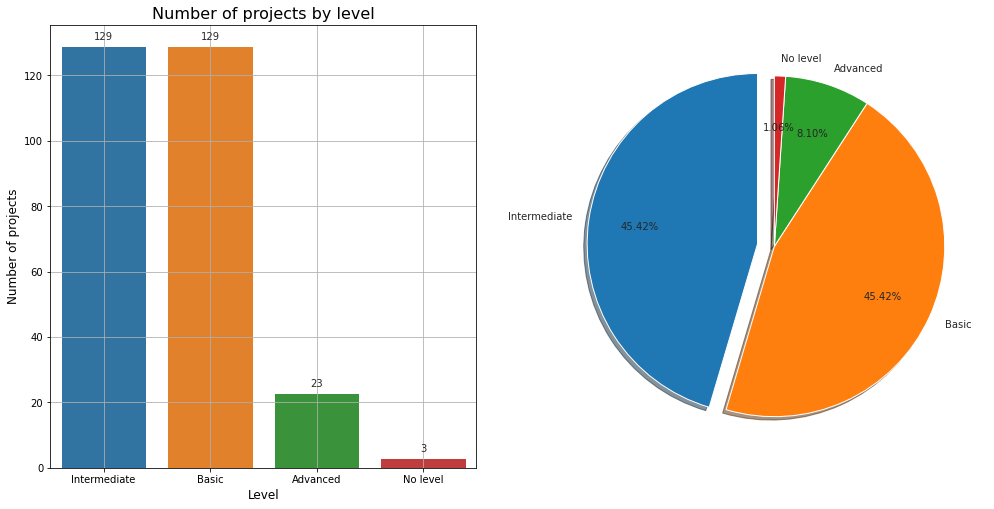

In [11]:
values = df_dr_snap["Level"].value_counts()
names = df_dr_snap.Level.unique()
fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 7))
fig.tight_layout(pad=2)
plt.subplot(1,2,1)
sns.set_style('whitegrid')
ax1 = sns.barplot(x=names, y=values, data=df_dr_snap)
for patch in ax1.patches:
    ax1.annotate(format(patch.get_height(), '.0f'),(patch.get_x() + patch.get_width() / 2., patch.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.title("Number of projects by level", fontsize=16)
plt.xlabel('Level', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
ax1.grid(True)

plt.subplot(1,2,2)
explode = (0.1, 0, 0, 0)
plt.pie(values, explode=explode, labels=names, autopct='%1.2f%%', shadow=True, startangle=90, pctdistance=0.7)
ax2.axis('equal')
ax2.grid(False)
plt.show()

El nivel intermedio y el nivel básico son los más frecuentes, agrupando ambos un 45,42% de los proyectos . Hay 3 proyectos con puntuaciones medias ("Average") inferiores o iguales a 0.5, que se corresponden con la categoría sin nivel. Existen 23 proyectos con las máximas puntuaciones medias, entre 2.5 y 3, del nivel avanzado.

A continuación se filtra por nivel, para conocer cómo se distribuyen las puntuaciones medias de los proyectos en cada uno de los 4 niveles.

In [12]:
filt_no_level = df_dr_snap['Level'].str.contains('No level', na=False)
df_dr_snap_no_level = df_dr_snap.loc[filt_no_level].sort_values(by="Average")
df_dr_snap_no_level

,Project,Path,Level,Score,Average,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
125,ping pong project,/home/rcruiz/Downloads/prueba_snap/9292/929277...,No level,0,0.125,0,0,0,0,0,1,0,0
209,Self Portrait,/home/rcruiz/Downloads/prueba_snap/9038/903830...,No level,0,0.375,0,0,1,0,0,1,1,0
230,self portrait,/home/rcruiz/Downloads/prueba_snap/9038/903854...,No level,0,0.375,0,0,1,0,0,1,1,0


Text(0, 0.5, 'Frequency of no level projects')

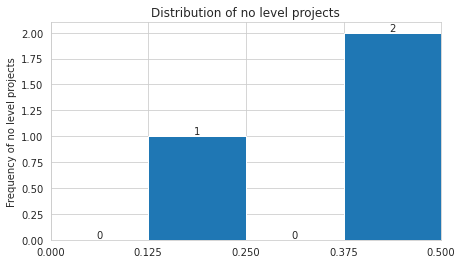

In [13]:
f, ax = plt.subplots(figsize=(7,4))
#sns.histplot(df_dr_snap_no_level, x="Average", bins=4, stat="count")
plt.hist(df_dr_snap_no_level["Average"], bins=4, range=(0, 0.5))
plt.bar_label(ax.containers[0])
x_left, x_right = ax.set_xlim(left=0, right=0.5)
ax.set_xticks(np.linspace(0, 0.5, 5))
plt.title("Distribution of no level projects")
plt.ylabel("Frequency of no level projects")

En esta representación se ve que hay 2 proyectos que toman el valor de 0,375 y 1 que toma el valor medio de 0,125. No hay nigún proyecto con puntuación media de 0. Todos tienen al menos un punto asignado de alguna de las 8 dimensiones que caracterizan el pensamiento computacional, pero su puntuación es demasiado baja.

In [14]:
filt_basic = df_dr_snap['Level'].str.contains('Basic', na=False)
df_dr_snap_basic = df_dr_snap.loc[filt_basic].sort_values(by="Average")
df_dr_snap_basic.tail()

,Project,Path,Level,Score,Average,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
173,Planning a Quiz app,/home/rcruiz/Downloads/prueba_snap/9038/903831...,Basic,1,1.375,2,0,1,0,0,2,3,3
186,Lab 3.4 If My Calculations Are Correct,/home/rcruiz/Downloads/prueba_snap/9038/903827...,Basic,1,1.375,0,0,1,3,0,2,3,2
192,"4.4 Crane, Skyler",/home/rcruiz/Downloads/prueba_snap/9038/903844...,Basic,1,1.375,0,0,1,3,1,2,1,3
72,ceaser,/home/rcruiz/Downloads/prueba_snap/9292/929252...,Basic,1,1.375,0,0,1,3,0,2,3,2
283,Lab - 2.4 Triangles of All Kinds,/home/rcruiz/Downloads/prueba_snap/2159/215940...,Basic,1,1.375,3,0,1,0,0,2,3,2


Text(0.5, 0, 'Average')

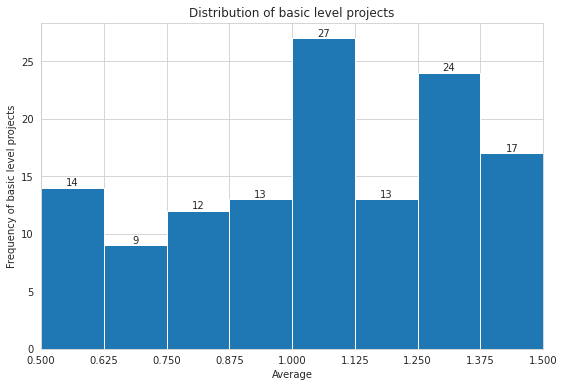

In [15]:
f, ax = plt.subplots(figsize=(9,6))
plt.hist(df_dr_snap_basic["Average"], bins=8, range=(0.5, 1.5))
plt.bar_label(ax.containers[0])
x_left, x_right = ax.set_xlim(left=0.5, right=1.5)
ax.set_xticks(np.linspace(0.5, 1.5, 9))
plt.title("Distribution of basic level projects")
plt.ylabel("Frequency of basic level projects")
plt.xlabel("Average")

Las mayores frecuencias absolutas para el nivel básico se obtienen para las puntuaciones medias de 1 y de 1.25, siendo más o menos uniformes en el resto de puntuaciones medias de este nivel.

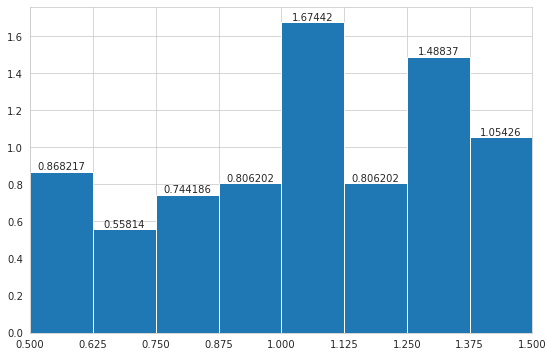

In [16]:
# En el caso de que el área sea igual a la unidad. Aprox. a la fdp.
f, ax = plt.subplots(figsize=(9,6))
plt.hist(df_dr_snap_basic["Average"],bins=8, density=True, range=(0.5, 1.5))
plt.bar_label(ax.containers[0])
x_left, x_right = ax.set_xlim(left=0.5, right=1.5)
ax.set_xticks(np.linspace(0.5, 1.5, 9))

In [17]:
filt_intermediate = df_dr_snap['Level'].str.contains('Intermediate', na=False)
df_dr_snap_intermediate = df_dr_snap.loc[filt_intermediate].sort_values(by="Average")
df_dr_snap_intermediate.head()

,Project,Path,Level,Score,Average,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
32,U2L2.3 Caesar Cipher Set Up,/home/rcruiz/Downloads/prueba_snap/9292/929271...,Intermediate,2,1.5,0,0,1,3,1,2,3,2
67,U2L2-Capturing-Points,/home/rcruiz/Downloads/prueba_snap/9292/929271...,Intermediate,2,1.5,0,0,2,3,1,2,2,2
55,carte bande numerique,/home/rcruiz/Downloads/prueba_snap/9292/929235...,Intermediate,2,1.5,0,2,1,3,3,1,2,0
205,Minimum or Maximum,/home/rcruiz/Downloads/prueba_snap/9038/903828...,Intermediate,2,1.5,0,0,1,3,1,2,3,2
212,U2L2-ShoppingList,/home/rcruiz/Downloads/prueba_snap/9038/903802...,Intermediate,2,1.5,0,0,1,3,0,2,3,3


Text(0.5, 0, 'Average')

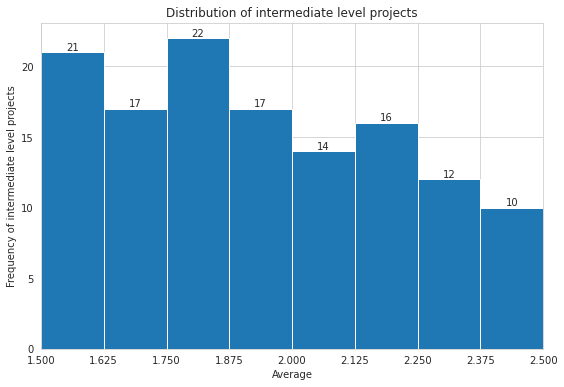

In [18]:
f, ax = plt.subplots(figsize=(9,6))
#sns.histplot(df_dr_snap_intermediate, x="Average", bins=8, stat="count")
plt.hist(df_dr_snap_intermediate["Average"], bins=8, range=(1.5, 2.5))
plt.bar_label(ax.containers[0])
x_left, x_right = ax.set_xlim(left=1.5, right=2.5)
ax.set_xticks(np.linspace(1.5, 2.5, 9))
plt.title("Distribution of intermediate level projects")
plt.ylabel("Frequency of intermediate level projects")
plt.xlabel("Average")

Las máximas puntuaciones medias se consiguen para las puntuaciones medias de 1.5 y 1.75. A partir de ahí se visualiza una cierta tendencia descendente.

In [19]:
filt_advanced = df_dr_snap['Level'].str.contains('Advanced', na=False)
df_dr_snap_advanced = df_dr_snap.loc[filt_advanced].sort_values(by="Average")
df_dr_snap_advanced.tail()

,Project,Path,Level,Score,Average,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
51,Ping Pong,/home/rcruiz/Downloads/prueba_snap/9292/929278...,Advanced,3,2.750,3,3,3,2,3,3,3,2
277,12/8-Final.Santos,/home/rcruiz/Downloads/prueba_snap/2171/217110...,Advanced,3,2.750,3,3,3,3,3,2,3,2
137,U5L2-DiseaseSpreadProject,/home/rcruiz/Downloads/prueba_snap/9292/929255...,Advanced,3,2.875,3,3,3,3,3,3,3,2
251,final,/home/rcruiz/Downloads/prueba_snap/9038/903889...,Advanced,3,3.000,3,3,3,3,3,3,3,3
282,GameIdea,/home/rcruiz/Downloads/prueba_snap/2141/214151...,Advanced,3,3.000,3,3,3,3,3,3,3,3


Text(0.5, 0, 'Average')

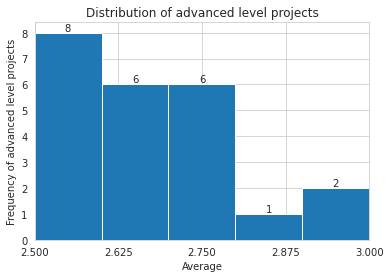

In [20]:
f, ax = plt.subplots(figsize=(6,4))
plt.hist(df_dr_snap_advanced["Average"], bins=5, range=(2.5, 3))
plt.bar_label(ax.containers[0])
x_left, x_right = ax.set_xlim(left=2.5, right=3)
ax.set_xticks(np.linspace(2.5, 3, 5))
plt.title("Distribution of advanced level projects")
plt.ylabel("Frequency of advanced level projects")
plt.xlabel("Average")

Las máximas puntuaciones medias correspondientes al nivel avanzado, también siguen cierta tendencia descendente, encontrando el máximo nº de proyectos para este nivel en 2.5 puntos de puntuación media.

In [21]:
level_statistics = df_dr_snap.groupby("Level")["Average"].agg([np.mean,np.median, np.var, np.std])
level_statistics

,mean,median,var,std
Level,,,,
Advanced,2.657609,2.625,0.024457,0.156386
Basic,0.992248,1.000,0.076600,0.276766
Intermediate,1.877907,1.875,0.076285,0.276198
No level,0.291667,0.375,0.020833,0.144338


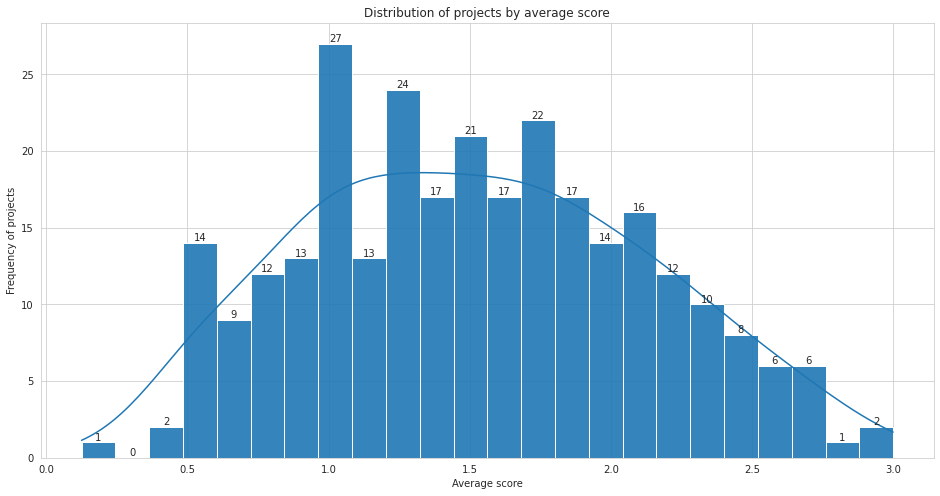

In [22]:
df_total=[df_dr_snap_no_level, df_dr_snap_basic, df_dr_snap_intermediate, df_dr_snap_advanced]
result = pd.concat(df_total)
f, ax = plt.subplots(figsize=(16,8))
ax = plt.gca()
sns.histplot(data=result, x="Average", bins=24, alpha=0.9, kde=True)
plt.bar_label(ax.containers[0])
plt.title("Distribution of projects by average score")
plt.ylabel("Frequency of projects")
plt.xlabel("Average score")
plt.show()

Este es el histograma que muestra la cantidad de proyectos que tienen una determinada media aritmética, de entre las 24 posibles en un rango de (0,3). Tomando valores continuos la media es numerable. Las mayores frecuencias se consiguen para las puntuaciones medias de 1, 1.25, 1.5 y 1.75. Existe una concentración del nº de proyectos en torno a 1.5, disminuyendo según nos acercamos a los valores extremos del intervalo.

## Frecuencia de los proyectos por dimensiones del pensamiento computacional

Se analiza a continuación el nº de proyectos que consiguen determinada puntuación en cada una de las ocho dimensiones analizadas.

In [23]:
df_ct = df_dr_snap.loc[:, "Conditional":"Data"]

In [24]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Conditional         284 non-null    uint8
 1   Synchronization     284 non-null    uint8
 2   Flow Control        284 non-null    uint8
 3   Abstraction         284 non-null    uint8
 4   Parallelism         284 non-null    uint8
 5   Diversity           284 non-null    uint8
 6   User Interactivity  284 non-null    uint8
 7   Data                284 non-null    uint8
dtypes: uint8(8)
memory usage: 2.3 KB


In [25]:
df_score_ct = pd.DataFrame(index=df_dr_snap["Score"].sort_values().unique().tolist())
for column in df_ct.columns:
    df_score_ct[column] = df_ct.groupby([column]).size().to_frame()
if 0 in df_score_ct.columns:
    df_score_ct.reset_index(drop=True, inplace=True)
    df_score_ct.drop(0, 1, inplace=True)
df_score_ct

,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
0,163,164,29,24,120,NaN,45,44
1,32,34,121,27,66,58.0,94,73
2,41,54,101,32,33,178.0,53,89
3,48,32,33,201,65,48.0,92,78


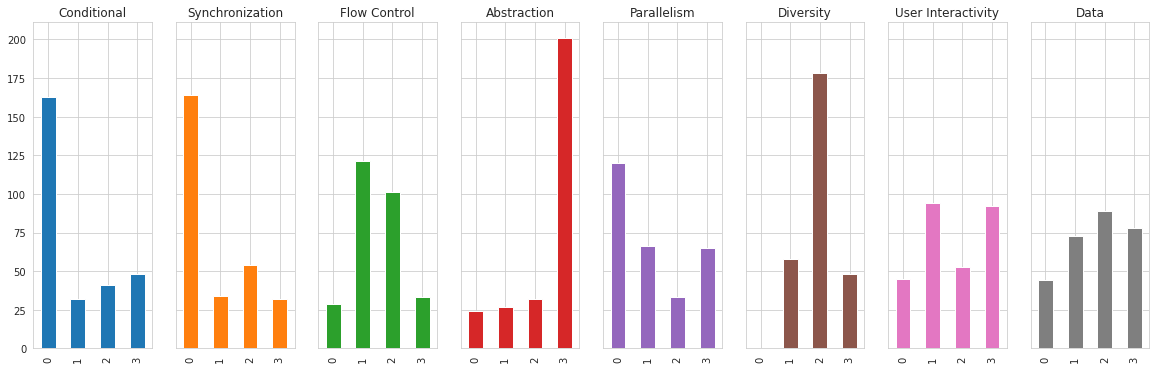

In [26]:
df_score_ct.plot(kind='bar', subplots=True, layout=(1,8), legend=False,figsize=(20, 6), sharey=True);

Todos los proyectos de Dr. Snap analizados tienen al menos un punto de diversidad. Esto indica que todos los proyectos cuenta con bloques con alguna de estas categorías (motion, looks, sound, pen, control, sensing, operators, variables). La mayor parte de los programas de Dr. Snap! reúnen bloques de entre 3 y 6 de estas categorías.

Los peores resultados se obtienen en el uso de condicionales o sentencias de control y en sincronización entre hilos de ejecución o eventos, donde 163 y 164 proyectos respectivamente no puntúan.
El mejor resultado se obtiene en abstracción, por lo que en los proyectos considerados de la muestra se divide adecuadamente el problema en scripts más sencillos.

## Frecuencias y correlaciones de las 8 dimensiones según nivel y puntuación media

Se representa a continuación el nº de proyectos que consiguen determinadas puntuaciones en cada una de las 8 áreas del pensamiento computacional que se analizan en los proyectos de Dr. Snap, esta vez desglosadas según el nivel o puntuación equivalente. También se analiza  se existe alguna dependencia lineal entre ellas, a partir de la correlación. Las equivalencias entre puntuaciones medias, puntuación total y nivel asignados se representan a continuación:
- [0, 0.5) --> Sin nivel --> puntuación 0.
- [0.5, 1.5) --> Básico --> puntuación 1.
- [1.5, 2.5) --> Intermedio --> puntuación 2.
- [2.5, 3) --> Avanzado --> puntuación 3.

In [27]:
ct = df_ct.columns.values.tolist()
def df_distrib_score(x, ct):
    return df_total_group.get_group(x).filter(ct)

In [28]:
def df_correlation_bar_chart(score, ct):
    print("--> Score:", score) #, " --> Level: ", list_level[score])
    df = df_distrib_score(score, ct).iloc[:, :].apply(pd.value_counts).fillna(0)
    df.T.plot.bar(align = 'center', color={0: "grey", 1: "red", 2:"orange", 3:"blue"}, alpha=0.8)
    plt.legend(loc=(1.04,0))
    title = "Distribution of skills CT with score=" + str(score)
    ylabel= "Nº of projects with score=" + str(score)
    plt.title(title)
    plt.ylabel(ylabel)
    display(df_distrib_score(score,ct))
    plt.show()
    #if score != 0:# or score !=21:
    print("Matriz de correlación entre las 8 dimensiones para la puntuación", score)
    display(df.corr())
    sns.heatmap(df.corr(), annot= True, cmap='RdBu', vmin=-1, vmax=1)
    plt.show()               

In [29]:
total_score = df_dr_snap["Score"].sort_values().unique().tolist()
list_level = ["No level", "Basic", "Intermediate", "Advanced"]
df_total_group = df_dr_snap.groupby("Score")
total_score

[0, 1, 2, 3]

--> Score: 0


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
125,0,0,0,0,0,1,0,0
209,0,0,1,0,0,1,1,0
230,0,0,1,0,0,1,1,0


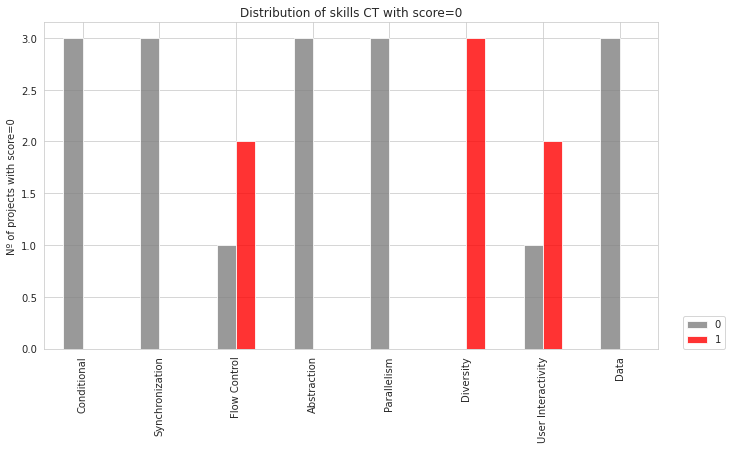

Matriz de correlación entre las 8 dimensiones para la puntuación 0


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
Conditional,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
Synchronization,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
Flow Control,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
Abstraction,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
Parallelism,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
Diversity,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
User Interactivity,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
Data,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0


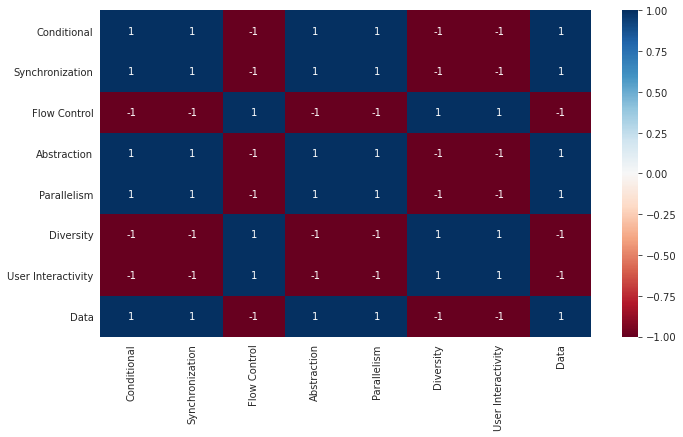

--> Score: 1


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
1,0,0,1,3,0,2,1,1
3,0,1,2,1,1,2,2,1
5,0,0,1,3,1,2,1,2
8,0,0,2,1,1,2,1,1
22,0,0,1,3,0,2,1,1
...,...,...,...,...,...,...,...,...
267,0,0,0,3,0,1,0,0
269,0,0,2,3,0,2,2,2
275,0,0,1,3,0,2,0,2
276,0,1,1,1,1,2,1,1


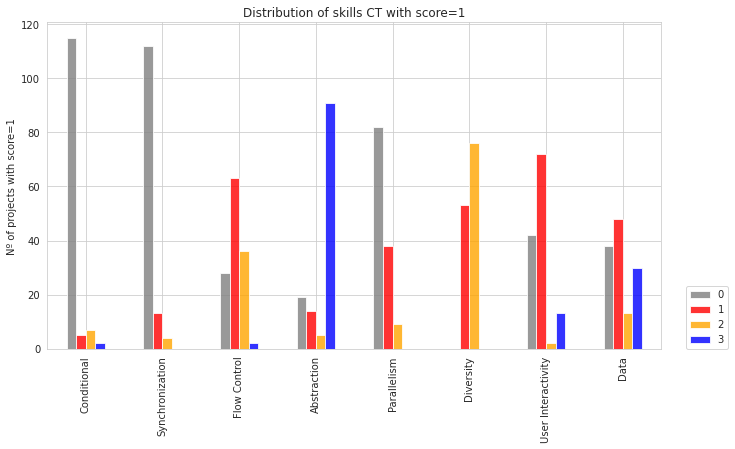

Matriz de correlación entre las 8 dimensiones para la puntuación 1


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
Conditional,1.000000,0.995667,-0.088764,-0.257467,0.903279,-0.528782,0.205609,0.245163
Synchronization,0.995667,1.000000,-0.015209,-0.288321,0.938280,-0.514374,0.295373,0.325325
Flow Control,-0.088764,-0.015209,1.000000,-0.799152,0.306894,0.661639,0.696900,0.408771
Abstraction,-0.257467,-0.288321,-0.799152,1.000000,-0.461857,-0.666044,-0.311207,0.016359
Parallelism,0.903279,0.938280,0.306894,-0.461857,1.000000,-0.343781,0.585672,0.547238
Diversity,-0.528782,-0.514374,0.661639,-0.666044,-0.343781,1.000000,-0.053115,-0.368543
User Interactivity,0.205609,0.295373,0.696900,-0.311207,0.585672,-0.053115,1.000000,0.937829
Data,0.245163,0.325325,0.408771,0.016359,0.547238,-0.368543,0.937829,1.000000


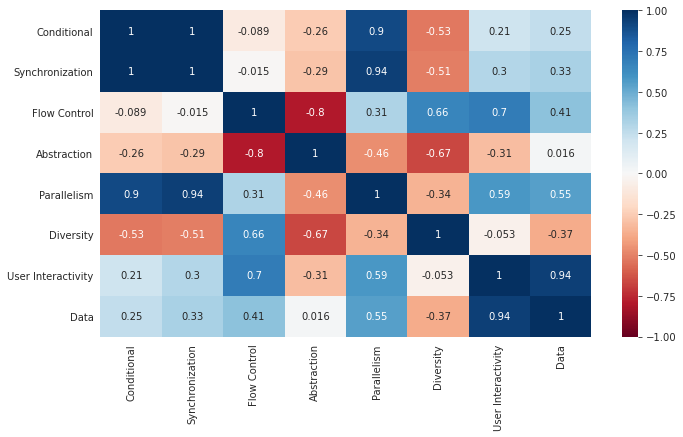

--> Score: 2


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
0,0,3,2,3,3,2,1,3
2,0,2,2,2,3,2,1,1
4,3,1,2,2,2,3,2,2
6,0,2,2,3,3,2,1,3
7,1,3,3,3,3,2,1,1
...,...,...,...,...,...,...,...,...
272,1,3,2,2,3,3,2,1
274,0,0,2,3,0,2,2,3
279,2,2,2,3,3,3,1,2
280,2,3,3,3,0,2,3,2


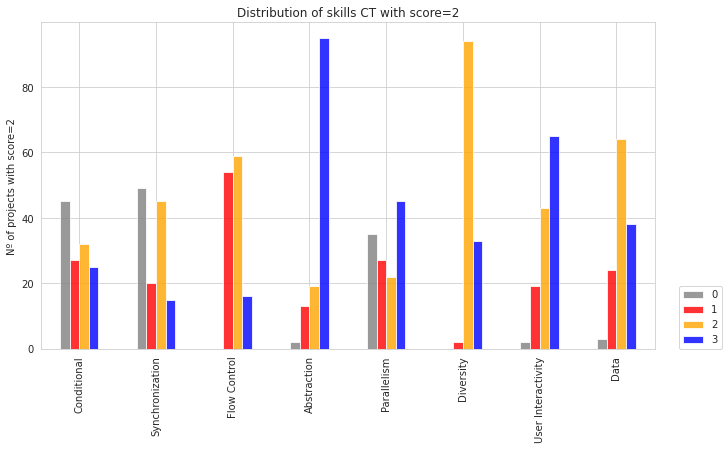

Matriz de correlación entre las 8 dimensiones para la puntuación 2


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
Conditional,1.000000,0.859668,-0.532529,-0.643130,-0.100518,-0.230908,-0.747897,-0.549152
Synchronization,0.859668,1.000000,-0.124320,-0.694163,-0.462640,0.266782,-0.542040,-0.062929
Flow Control,-0.532529,-0.124320,1.000000,-0.222776,-0.787650,0.533147,0.185768,0.686719
Abstraction,-0.643130,-0.694163,-0.222776,1.000000,0.746012,0.140977,0.878908,0.302054
Parallelism,-0.100518,-0.462640,-0.787650,0.746012,1.000000,-0.418638,0.353661,-0.375040
Diversity,-0.230908,0.266782,0.533147,0.140977,-0.418638,1.000000,0.569480,0.937958
User Interactivity,-0.747897,-0.542040,0.185768,0.878908,0.353661,0.569480,1.000000,0.720131
Data,-0.549152,-0.062929,0.686719,0.302054,-0.375040,0.937958,0.720131,1.000000


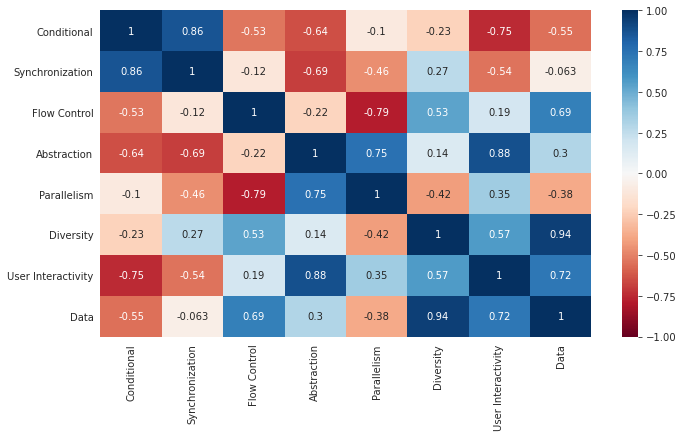

--> Score: 3


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
23,3,3,3,2,3,3,1,2
51,3,3,3,2,3,3,3,2
85,2,3,2,3,3,2,2,3
90,3,3,3,3,1,2,2,3
97,3,3,2,3,3,3,3,2
131,3,2,1,3,3,3,2,3
137,3,3,3,3,3,3,3,2
144,3,3,3,2,3,3,3,2
153,3,1,3,3,2,3,3,3
158,3,3,3,3,3,2,2,2


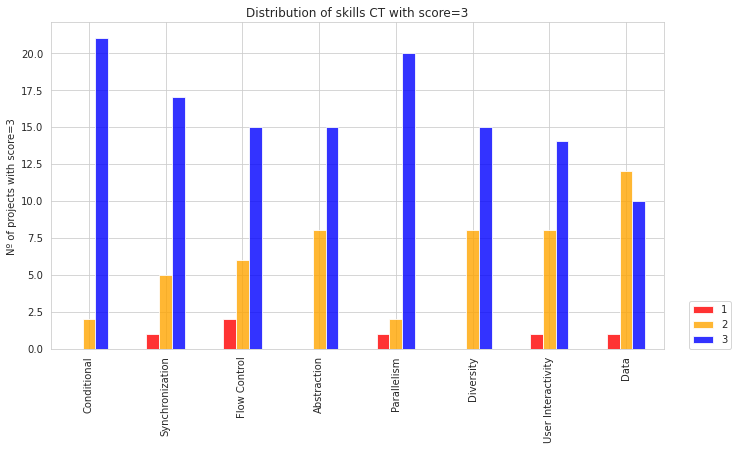

Matriz de correlación entre las 8 dimensiones para la puntuación 3


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
Conditional,1.000000,0.987829,0.976180,0.888980,0.999216,0.888980,0.886258,0.424566
Synchronization,0.987829,1.000000,0.998046,0.949391,0.980895,0.949391,0.947517,0.560226
Flow Control,0.976180,0.998046,1.000000,0.967161,0.966823,0.967161,0.965642,0.610888
Abstraction,0.888980,0.949391,0.967161,1.000000,0.870149,1.000000,0.999983,0.792053
Parallelism,0.999216,0.980895,0.966823,0.870149,1.000000,0.870149,0.867221,0.388380
Diversity,0.888980,0.949391,0.967161,1.000000,0.870149,1.000000,0.999983,0.792053
User Interactivity,0.886258,0.947517,0.965642,0.999983,0.867221,0.999983,1.000000,0.795648
Data,0.424566,0.560226,0.610888,0.792053,0.388380,0.792053,0.795648,1.000000


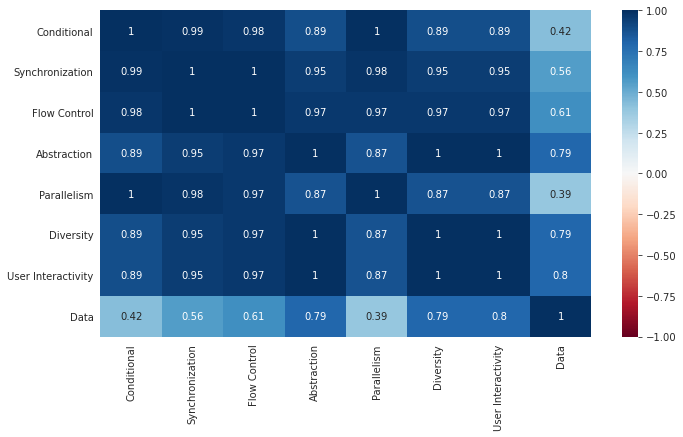

In [30]:
for score in total_score: 
    df_correlation_bar_chart(score, ct)
#df_correlation_bar_chart(0, ct)

- **Para la puntuación de 0 o proyectos sin nivel**: Se observa en el diagrama de barras que todos los proyectos tienen 1 punto en diversidad, y dos de ellos tienen 1 punto en control de flujo y en interactividad con el usuario. En la matriz de correlación se obtiene entre cada par de estas variables una correlación o dependencia lineal perfecta. Es una correlación lineal en sentido negativo cuando se consideran estas variables con respecto a cada una de las demás, cuyo valor se mantiene en 0.
  

- **Para la puntuación de 1 o proyectos de nivel básico**: En el diagrama de barras destaca que la mayor parte de los proyectos tienen 3 puntos en abstracción. Más de la mitad de los proyectos tienen 1 punto en control de flujo y en interactividad con el usuario. En diversidad los proyectos analizados con Dr. Snap! se reparten entre los que consiguen 1 punto y 2 puntos. En el empleo de condicionales y en sincronismo se mantienen en 0 puntos. 

  La matriz de correlación muestra que no existe dependencia lineal entre sincronismo y condicionales y entre flujo de control con condicionales, dimensiones entre las que debiera existir cierta dependencia, pero al tomar tanto en sincronismo como en condicionales una puntuación de 0 se entiende que la correlación sea próxima a 0. Existe una correlación en sentido positivo casi perfecta entre paralelismo y uso de condicionales, que llama la atención, pues ejecutar bloques de instrucciones en hilos diferentes no tendría que estar relacionada con la ejecución de una sentencia u otra en función de condiciones; entre paralelismo y sincronismo, relacionadas conceptualmente, ya que si se ejecutan secuencias de bloques en hilos diferentes debe existir alguna forma de ajustarlos temporalmente, y una correlación perfecta en sentido positivo entre sincronismo y uso de condicionales, que no se corresponde con lo esperado, ya que la ejecución de una sentencia u otra en función de una condición no guarda relación con que dos eventos o flujos de código distintos se sincronicen. Existe además una correlación positiva elevada entre control de flujo e interactividad con el usuario, y una correlación también elevada en sentido negativo entre abstracción y control de flujo, de modo que cuanto mayor capacidad se presenta en el proyecto para separar la solución del problema en conjuntos de instrucciones más sencillos, menor es la capacidad para ordenar las instrucciones. El hecho de que aumente el valor de una dimensión no debería provocar la disminución de la otra. 
  
  
- **Para la puntuación de 2 o proyectos de nivel intermedio**: En el diagrama de barras, se observa que cada vez más proyectos emplean condicionales y sincronismo, estando las puntuaciones más repartidas entre 1, 2 y 3 puntos. En control de flujo las puntuaciones de los proyectos se reparten principalmente entre 1 y 2 puntos. En abstracción predominan los 3 puntos. En diversidad se concentran en 2 puntos. En paralelismo, interactividad del usuario y representación de los datos, cada vez hay mayor cantidad de proyectos con 2 y 3 puntos.

  Entre representación de los datos, ya sea con listas, variables y otros atributos de los personajes, y diversidad en el empleo de bloques, existe una correlación positiva muy elevada, aunque en principio se podría esperar que no están relacionadas. Según aumenta la capacidad para dividir el programa en partes más sencillas (abstracción), aumenta la interactividad del usuario, según la matriz de correlación aunque en la práctica no tendría que ser así. También se presenta una correlación positiva muy elevada entre sincronismo y uso de condicionales y paralelismo con abstracción. No existe dependencia lineal entre sincronismo con representación de los datos, ni entre paralelismo con condicionales. Existe una correlación negativa elevada entre interactividad del usuario con condicionales, pero el aumento del uso de condiciones no debería afectar en que disminuya la gestión de los distintos eventos que introduzca el usuario, y entre paralelismo con control de flujo, de modo que cuando se ejecutan instrucciones en flujos de código diferente, indicaría que disminuye la capacidad para coordinar el orden de las instrucciones en un único flujo.
  
  
- **Para la puntuación de 3 o nivel avanzado**: En el diagrama de barras se ve que prácticamente en todas las dimensiones se agrupan gran nº de proyectos con puntuación de 3, salvo en representación de los datos. En la matriz de correlación se manifiesta este hecho, puesto que todas las dimensiones se relacionan linealmente con las demás, presentando coeficientes de correlación en sentido positivo muy elevados, salvo en el caso de representación de los datos con condicionales, sincronismo, paralelismo y flujo de control.

In [31]:
ct = df_ct.columns.values.tolist()
total_average = df_dr_snap["Average"].sort_values().unique().tolist()
df_total_group = df_dr_snap.groupby("Average")

In [32]:
# Obtiene todos los diagramas de barras y correlaciones para cada puntuación media
#for avg in total_average: 
#    df_correlation_bar_chart(avg, ct)

In [33]:
total_average

[0.125,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 1.0,
 1.125,
 1.25,
 1.375,
 1.5,
 1.625,
 1.75,
 1.875,
 2.0,
 2.125,
 2.25,
 2.375,
 2.5,
 2.625,
 2.75,
 2.875,
 3.0]

--> Score: 0.125


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
125,0,0,0,0,0,1,0,0


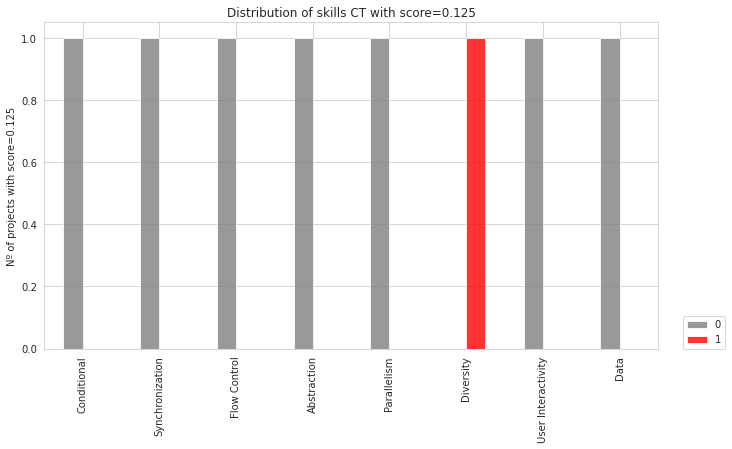

Matriz de correlación entre las 8 dimensiones para la puntuación 0.125


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
Conditional,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0
Synchronization,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0
Flow Control,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0
Abstraction,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0
Parallelism,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0
Diversity,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
User Interactivity,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0
Data,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0


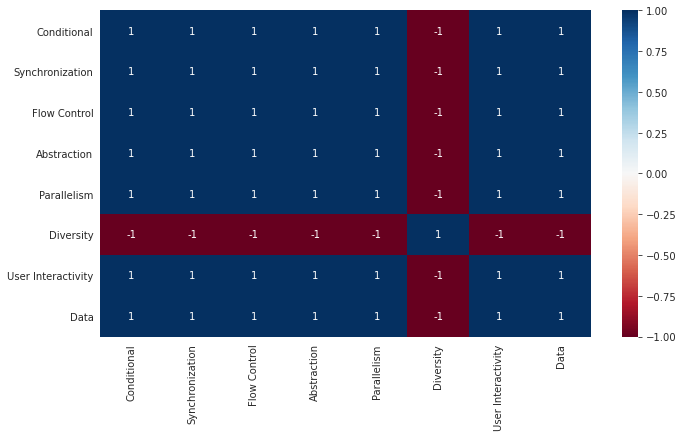

In [34]:
df_correlation_bar_chart(0.125, ct)

- Para la puntuación media de 0.125 solo hay 1 proyecto con un valor de diversidad de 1 punto. El resto de dimensiones están a 0 puntos. Por ello obtenemos esta matriz de correlación.

--> Score: 0.375


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
209,0,0,1,0,0,1,1,0
230,0,0,1,0,0,1,1,0


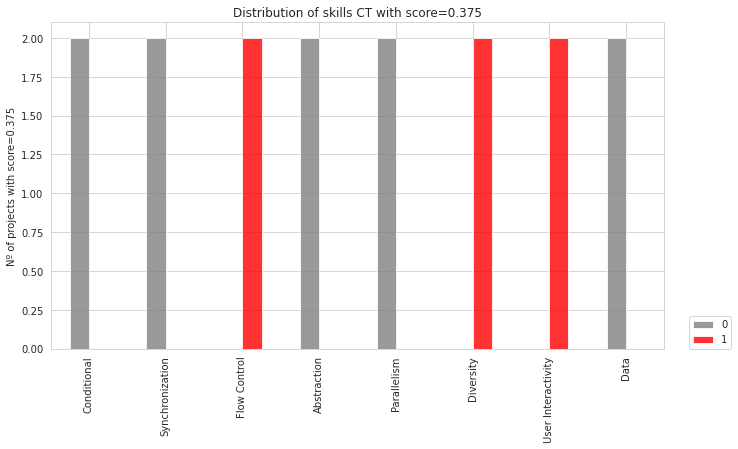

Matriz de correlación entre las 8 dimensiones para la puntuación 0.375


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
Conditional,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
Synchronization,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
Flow Control,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
Abstraction,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
Parallelism,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
Diversity,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
User Interactivity,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
Data,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0


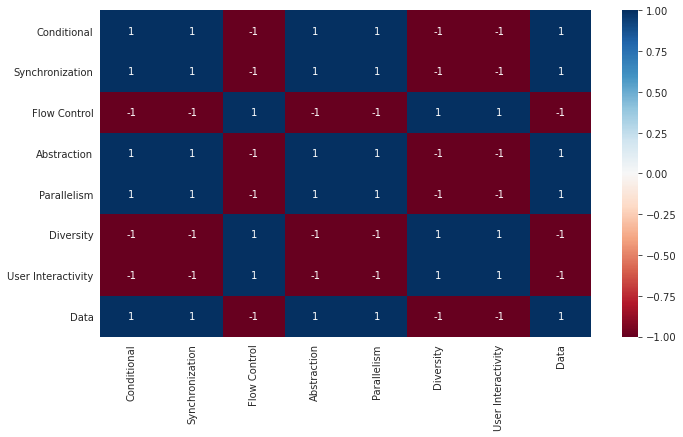

In [35]:
df_correlation_bar_chart(0.375, ct)

- Para la puntuación media de 0.375: hay dos proyectos que puntúan en control de flujo, interactividad con el usuario y diversidad.
  La matriz de correlación presenta entre cada par de esas dimensiones una correlación perfecta positiva. Si se cosidera cada una de ellas con el resto de dimensiones el coeficiente de correlación vale -1, siendo perfecto pero en sentido negativo. Se debe a que las demás áreas del pensamiento computacional valen 0.

--> Score: 0.5


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
35,0,0,0,3,0,1,0,0
52,0,0,0,3,0,1,0,0
69,0,0,0,3,0,1,0,0
77,0,0,0,3,0,1,0,0
89,0,0,0,3,0,1,0,0
110,0,0,0,3,0,1,0,0
136,0,0,0,3,0,1,0,0
145,0,0,0,3,0,1,0,0
157,0,0,0,3,0,1,0,0
194,0,0,0,3,0,1,0,0


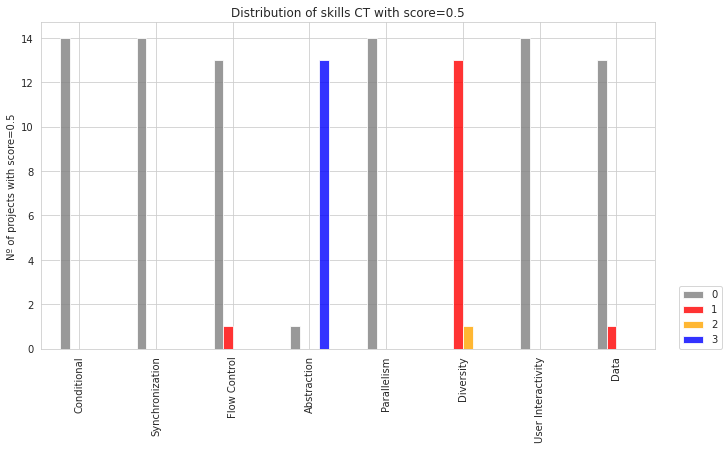

Matriz de correlación entre las 8 dimensiones para la puntuación 0.5


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
Conditional,1.000000,1.000000,0.997241,-0.262432,1.000000,-0.367405,1.000000,0.997241
Synchronization,1.000000,1.000000,0.997241,-0.262432,1.000000,-0.367405,1.000000,0.997241
Flow Control,0.997241,0.997241,1.000000,-0.297521,0.997241,-0.297521,0.997241,1.000000
Abstraction,-0.262432,-0.262432,-0.297521,1.000000,-0.262432,-0.404959,-0.262432,-0.297521
Parallelism,1.000000,1.000000,0.997241,-0.262432,1.000000,-0.367405,1.000000,0.997241
Diversity,-0.367405,-0.367405,-0.297521,-0.404959,-0.367405,1.000000,-0.367405,-0.297521
User Interactivity,1.000000,1.000000,0.997241,-0.262432,1.000000,-0.367405,1.000000,0.997241
Data,0.997241,0.997241,1.000000,-0.297521,0.997241,-0.297521,0.997241,1.000000


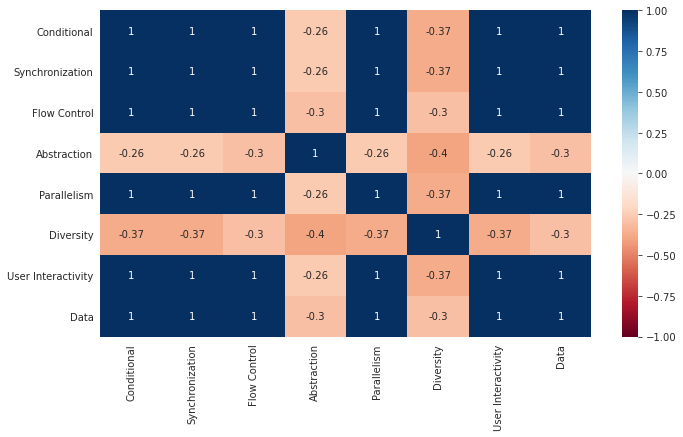

In [36]:
df_correlation_bar_chart(0.5, ct)

- Para la puntuación media de 0.5: En el diagrama de barras se ve que la mayor parte de los 14 proyectos de Dr. Snap! toman un valor de 3 puntos en abstracción y 1 punto en diversidad.
  
  La matriz de correlación presenta tanto en abstracción como en diversidad dependencias lineales muy débiles negativas con cada una de las otras 7 dimensiones. Se explica porque el resto de áreas del pensamiento computacional tienen un valor de 0 para todos los proyectos. Es más, como en los casos anteriores, la correlación lineal es perfecta positiva entre cada par de dimensiones cuyo valor es 0. Entre diversidad y abstracción el coeficiente de correlación es débil y negativo. La creación de bloques definidos por el usuario que resuelven el problema de una manera más sencilla hace que se empleen menos categorías de bloques, según el valor obtenido de correlación.

--> Score: 0.625


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
83,0,0,1,3,0,1,0,0
122,0,0,2,0,0,1,1,1
161,0,0,0,3,0,1,1,0
171,0,0,1,0,0,2,1,1
197,0,0,1,0,0,2,1,1
200,0,0,2,0,0,2,0,1
210,0,0,0,3,0,1,1,0
255,0,0,1,0,0,2,1,1
260,0,0,0,3,0,1,1,0


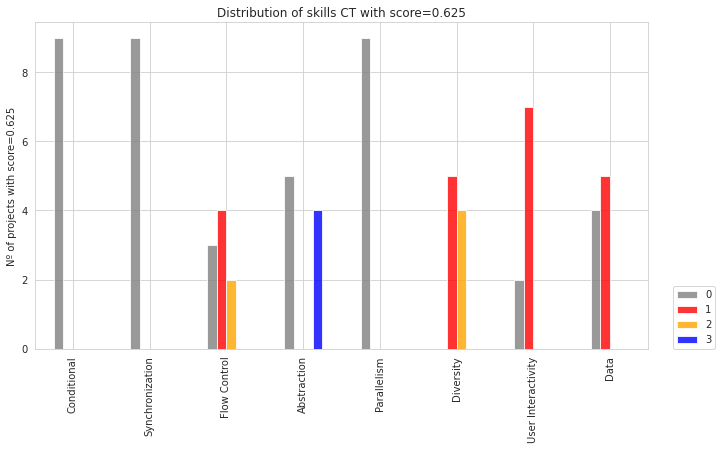

Matriz de correlación entre las 8 dimensiones para la puntuación 0.625


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
Conditional,1.000000,1.000000,0.292770,0.697097,1.000000,-0.570352,-0.050443,0.443607
Synchronization,1.000000,1.000000,0.292770,0.697097,1.000000,-0.570352,-0.050443,0.443607
Flow Control,0.292770,0.292770,1.000000,-0.389624,0.292770,0.575160,0.812256,0.872017
Abstraction,0.697097,0.697097,-0.389624,1.000000,0.697097,-0.975904,-0.393196,-0.012048
Parallelism,1.000000,1.000000,0.292770,0.697097,1.000000,-0.570352,-0.050443,0.443607
Diversity,-0.570352,-0.570352,0.575160,-0.975904,-0.570352,1.000000,0.565819,0.228916
User Interactivity,-0.050443,-0.050443,0.812256,-0.393196,-0.050443,0.565819,1.000000,0.872703
Data,0.443607,0.443607,0.872017,-0.012048,0.443607,0.228916,0.872703,1.000000


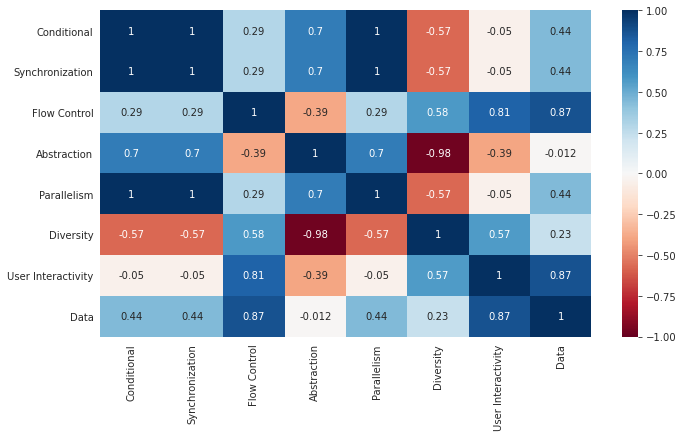

In [37]:
df_correlation_bar_chart(0.625, ct)

- Para la puntuación media de 0.625: Las frecuencias con que los proyectos alcanzan un punto en representación de los datos y en interactividad con el usuario son elevadas. En flujo de control y diversidad se reparten entre los que consiguen 1 y 2 puntos. Cuatro proyectos de los 9 consiguen 3 puntos en abstracción.

  La correlación es positiva y perfecta entre las dimensiones cuya puntuación en los proyectos es de 0. Es elevada en sentido positivo entre interactividad del usuario con representación de los datos, aunque no exista aparentemente relación entre la declaración de atributos con ofrecer al usuario que realice acciones sobre el programa. Existe también una relación lineal elevada entre control de flujo y representación de los datos, y entre control de flujo e interactividad con el usuario, de modo que cuando el proyecto de Dr. Snap! presenta una secuencia de instrucciones apropiada, también debe añadir la ejecución de eventos que el usuario introduce y la declaración apropiada de atributos de los objetos, y esto no siempre se cumple. No existe dependencia lineal entre interactividad con el usuario y uso de condicionales, sincronización y paralelismo. La correlación entre abstracción y diversidad es prácticamente perfecta en sentido negativo. Al crear bloques definidos por el programador y hacer scripts más sencillos tendría que disminuir el uso de distintas categorías de bloques, según indica la correlación.

--> Score: 0.75


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
27,0,0,1,3,0,1,0,1
40,0,0,0,3,0,1,0,2
59,0,0,0,3,0,1,0,2
63,0,0,1,0,0,2,1,2
74,0,2,2,0,0,1,1,0
94,0,0,1,3,0,2,0,0
113,0,0,1,0,0,2,1,2
124,0,0,0,3,1,1,1,0
139,0,0,1,3,0,1,0,1
189,0,0,0,3,1,1,1,0


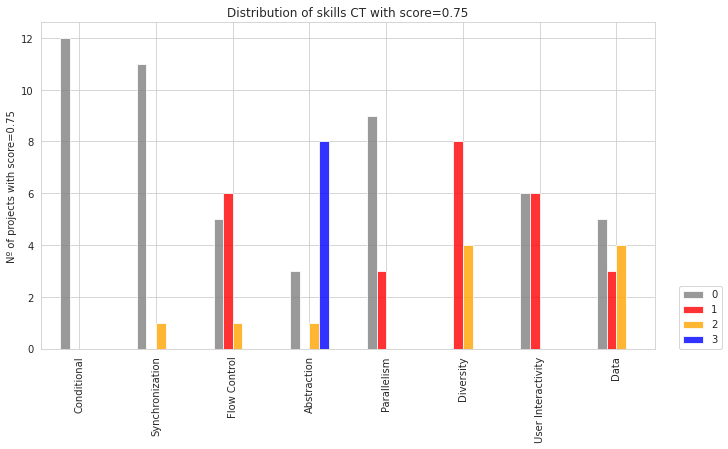

Matriz de correlación entre las 8 dimensiones para la puntuación 0.75


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
Conditional,1.000000,0.996116,0.452911,0.000000,0.942809,-0.522233,0.577350,0.617213
Synchronization,0.996116,1.000000,0.422955,-0.034986,0.924473,-0.520205,0.539164,0.662849
Flow Control,0.452911,0.422955,1.000000,-0.636285,0.720577,0.473050,0.980581,0.576557
Abstraction,0.000000,-0.034986,-0.636285,1.000000,-0.198680,-0.782586,-0.486664,-0.737043
Parallelism,0.942809,0.924473,0.720577,-0.198680,1.000000,-0.246183,0.816497,0.654654
Diversity,-0.522233,-0.520205,0.473050,-0.782586,-0.246183,1.000000,0.301511,0.161165
User Interactivity,0.577350,0.539164,0.980581,-0.486664,0.816497,0.301511,1.000000,0.534522
Data,0.617213,0.662849,0.576557,-0.737043,0.654654,0.161165,0.534522,1.000000


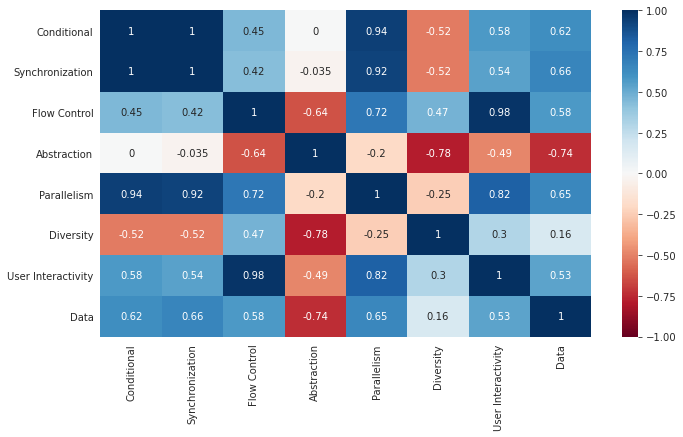

In [38]:
df_correlation_bar_chart(0.75, ct)

- Para la puntuación media de 0.75: En representación de los datos, algunos proyectos consiguen 2 puntos, según se ve en el diagrama de barras.

  La matriz de correlación muestra relaciones lineales positivas muy elevadas entre paralelismo y uso de condicionales, aunque esta última sigue valiendo 0 en todos los proyectos, y entre sincronismo y paralelismo, permitiendo que varios scripts se ejecuten simultáneamente aunque no haya mecanismos que los sincronicen (0 puntos). También existe una correlación elevada entre flujo de control e interactividad con el usuario, pues cuando el usuario realiza la primera acción sobre el programa (bandera verde) hace que se ejecuten el conjunto de bloques que conforman el script, y entre paralelismo e interactividad con el usuario, de manera que cuando el usuario haga determinado movimiento, no tendría que mejorar la ejecución de dos flujos de código en paralelo. No existe dependencia entre abstracción y uso de condicionales ni entre abstracción y sincronismo. Y de nuevo como en la puntuación media anterior, se da una correlación en sentido negativo bastante elevada entre abstracción y diversidad.

--> Score: 0.875


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
54,0,0,0,3,0,1,0,3
62,0,0,0,3,0,1,0,3
87,0,0,0,3,0,1,0,3
103,0,0,3,3,0,1,0,0
104,0,0,0,3,0,1,0,3
117,0,0,3,3,0,1,0,0
140,0,0,0,3,0,1,0,3
152,0,0,1,3,0,2,1,0
182,0,0,1,1,1,2,1,1
187,0,0,1,0,0,2,1,3


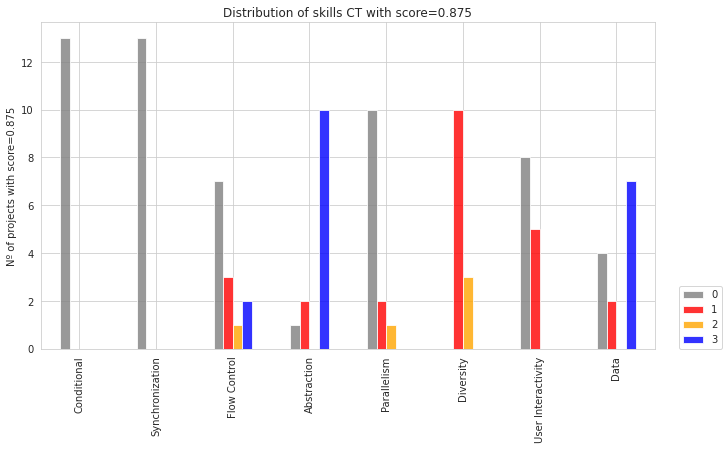

Matriz de correlación entre las 8 dimensiones para la puntuación 0.875


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
Conditional,1.000000,1.000000,0.950586,-0.327978,0.983935,-0.459332,0.802181,0.167444
Synchronization,1.000000,1.000000,0.950586,-0.327978,0.983935,-0.459332,0.802181,0.167444
Flow Control,0.950586,0.950586,1.000000,-0.256346,0.963028,-0.248546,0.923077,0.244060
Abstraction,-0.327978,-0.327978,-0.256346,1.000000,-0.450199,-0.343793,-0.447728,0.872584
Parallelism,0.983935,0.983935,0.963028,-0.450199,1.000000,-0.297439,0.881608,0.042714
Diversity,-0.459332,-0.459332,-0.248546,-0.343793,-0.297439,1.000000,0.138735,-0.526553
User Interactivity,0.802181,0.802181,0.923077,-0.447728,0.881608,0.138735,1.000000,-0.007069
Data,0.167444,0.167444,0.244060,0.872584,0.042714,-0.526553,-0.007069,1.000000


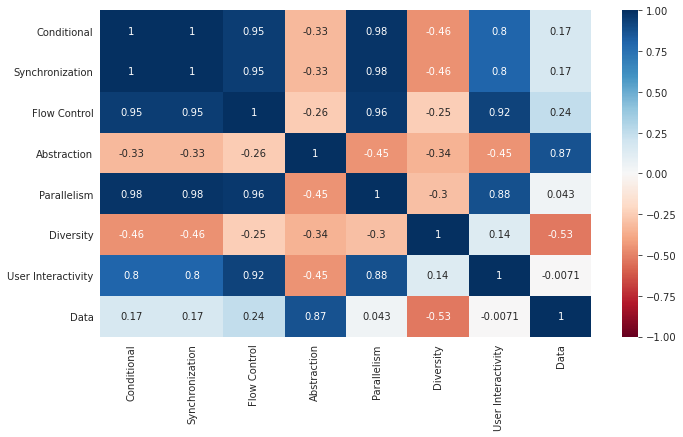

In [39]:
df_correlation_bar_chart(0.875, ct)

- Para la puntuación media de 0.875: La mayor parte de los proyectos de Dr. Snap! presentan una puntuación de 0 en el uso de condicionales, en sincronización y en paralelismo. En representación de los datos la mitad consiguen 3 puntos, por el empleo de listas en el programa.

  La matriz de correlación tiene valores de dependencia lineal casi perfecta en flujo de control con condicionales y con sincronismo, en paralelismo con condicionales, sincronismo y flujo de control, en interactividad del usuario con condicionales, sincronismo, flujo de control y paralelismo y entre representación de los datos con abstacción. Como el uso de condicionales y el sincronismo tienen una puntuación de 0, es complicado establecer dependencias con el resto de dimensiones. En la dependencia lineal que existe entre control de flujo y paralelismo, el que se realicen un conjunto de instrucciones en paralelo en algunos de los proyectos dependería lineamente con que un único flujo del programa se ejecute en un orden apropiado y contemple el uso de bucles. La interactividad con el usuario se relaciona linealmente en sentido positivo con un elevado coeficiente de correlación con el control de flujo y con el paralelismo. También es elevado entre abstracción y representación de los datos. No existe correlación entre representación de los datos con paralelismo e interactividad con el usuario.

--> Score: 1


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
1,0,0,1,3,0,2,1,1
8,0,0,2,1,1,2,1,1
22,0,0,1,3,0,2,1,1
30,0,0,1,3,2,1,1,0
57,0,0,1,3,0,2,1,1
60,0,0,1,3,0,1,0,3
73,0,0,1,3,0,2,1,1
78,0,0,1,3,0,1,0,3
81,0,0,1,3,0,2,1,1
106,0,0,1,3,2,1,1,0


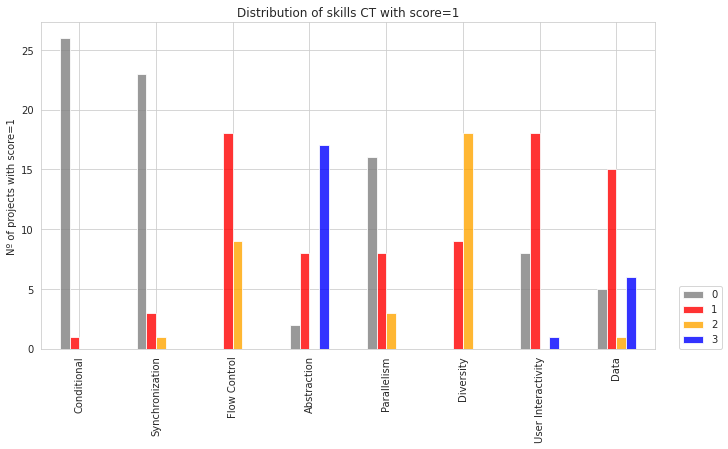

Matriz de correlación entre las 8 dimensiones para la puntuación 1


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
Conditional,1.000000,0.996736,-0.494770,-0.415764,0.897190,-0.521881,0.136793,-0.163628
Synchronization,0.996736,1.000000,-0.423026,-0.449568,0.929819,-0.486880,0.205277,-0.109926
Flow Control,-0.494770,-0.423026,1.000000,-0.193872,-0.062224,0.636364,0.660528,0.633381
Abstraction,-0.415764,-0.449568,-0.193872,1.000000,-0.538594,-0.558806,-0.027620,0.367712
Parallelism,0.897190,0.929819,-0.062224,-0.538594,1.000000,-0.311118,0.515256,0.167360
Diversity,-0.521881,-0.486880,0.636364,-0.558806,-0.311118,1.000000,-0.094361,-0.191487
User Interactivity,0.136793,0.205277,0.660528,-0.027620,0.515256,-0.094361,1.000000,0.908854
Data,-0.163628,-0.109926,0.633381,0.367712,0.167360,-0.191487,0.908854,1.000000


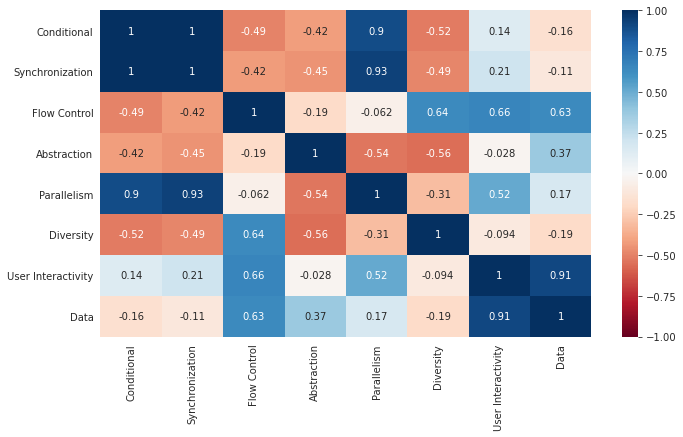

In [40]:
df_correlation_bar_chart(1, ct)

- Para la puntuación media de 1: En el diagrama de barras se observa que los proyectos toman valores en flujo de control de 1 y 2 puntos, en abstracción de 1 y 3 y se eleva la puntuación en diversidad (la mayoría consiguen 2 puntos), interactividad con el usuario y en representación de los datos.

  En la matriz de correlación se da una elevada correlación en sentido positivo entre paralelismo con condicionales y sincronismo, aunque estas dos últimas sigan valiendo 0 para la mayoría de los proyectos. También es elevada entre interactividad con el usuario y representación de los datos, indicando que la declaración de atributos influye positivamente en la primera acción que realiza el usuario en el programa, aunque a priori, parezca que no existe relación. Se da una correlación positiva moderada entre control de flujo con: diversidad, interactividad con el usuario y representación de los datos. No existe dependencia lineal entre paralelismo y control de flujo, entre interactividad con el usuario y abstracción, entre interactividad con el usuario y diversidad.

--> Score: 1.125


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
29,0,0,1,3,0,2,0,3
76,0,0,2,3,0,2,1,1
108,0,0,1,3,0,2,0,3
127,0,2,1,3,1,1,1,0
134,0,0,1,2,0,2,3,1
147,0,0,2,3,1,1,1,1
163,2,0,1,0,0,2,3,1
188,2,0,1,0,0,2,3,1
195,0,0,1,3,1,2,1,1
207,0,1,2,3,0,1,1,1


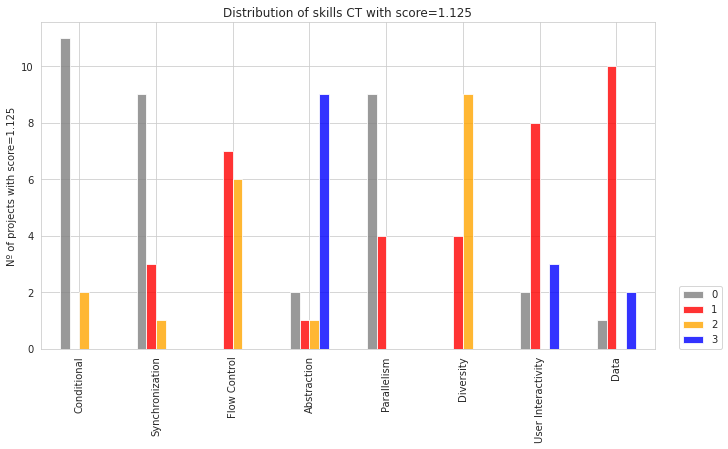

Matriz de correlación entre las 8 dimensiones para la puntuación 1.125


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
Conditional,1.000000,0.924989,-0.508596,-0.299904,0.843121,-0.360276,-0.377628,-0.433670
Synchronization,0.924989,1.000000,-0.334052,-0.433552,0.982328,-0.411320,-0.006074,-0.058761
Flow Control,-0.508596,-0.334052,1.000000,-0.668746,-0.294547,0.821631,0.356744,0.535782
Abstraction,-0.299904,-0.433552,-0.668746,1.000000,-0.409107,-0.590932,-0.082416,-0.231171
Parallelism,0.843121,0.982328,-0.294547,-0.409107,1.000000,-0.479452,0.177677,0.115161
Diversity,-0.360276,-0.411320,0.821631,-0.590932,-0.479452,1.000000,-0.234993,-0.038387
User Interactivity,-0.377628,-0.006074,0.356744,-0.082416,0.177677,-0.234993,1.000000,0.979731
Data,-0.433670,-0.058761,0.535782,-0.231171,0.115161,-0.038387,0.979731,1.000000


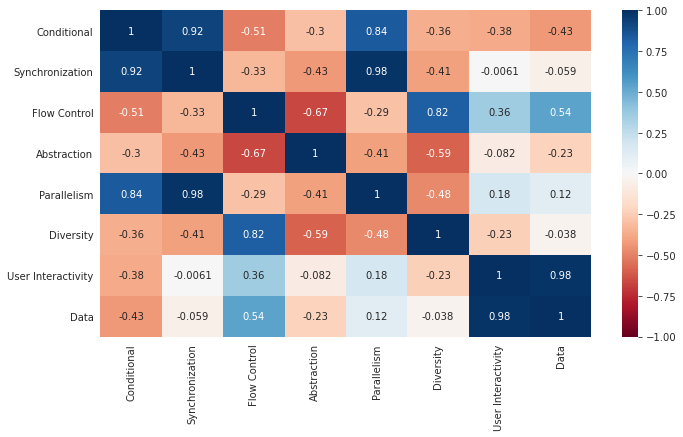

In [41]:
df_correlation_bar_chart(1.125, ct)

- Para la puntuación de 1.125: En el diagrama de barras comienzan a visualizarse mayor nº de proyectos con puntuación en sincronismo e incluso en condicionales. En abstracción la mayoría tienen 3 puntos. En diversidad se reparten entre los 2 puntos y 1 punto. En interactividad con el usuario y representación de los datos predominan los que tienen 1 punto.

  En la matriz de correlación se consiguen los valores más elevados de correlación entre sincronización y condicionales, de modo que existe dependencia lineal entre la ejecución de sentencias en función de condiciones y hacer que las distintas sentencias se ejecuten según un orden temporal, entre paralelismo y condicionales, de forma que el hecho de que se ejecuten varios scripts simultáneamente depende de que se empleen condicionales, aunque no parezca que guarden relación, entre paralelismo y sincronización, ejecutándose varios scripts en paralelo y estableciendo un orden temporal entre ellos, entre control de flujo y diversidad, de modo que al utilizar bloques de distintas categorías aumenta la capacidad para coordinar el orden en que se ejecutan las instrucciones y los bucles, y entre interactividad con el usuario y representación de los datos, cuando el usuario realiza acciones sobre el programa, influye en asignar atributos a los personajes, aunque esta dependencia resulta extraña. No existe dependencia lineal entre interactividad con el usuario con sincronismo, entre interactividad con el usuario con abstracción y entre representación de los datos con: sincronismo, paralelismo y diversidad.

--> Score: 1.25


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
3,0,1,2,1,1,2,2,1
5,0,0,1,3,1,2,1,2
26,1,0,1,3,0,2,0,3
31,1,0,2,3,0,2,1,1
70,0,0,2,3,0,2,1,2
100,0,0,2,3,1,2,1,1
105,0,2,2,0,0,2,1,3
115,0,0,2,3,2,1,1,1
148,0,1,2,3,0,2,1,1
150,0,0,2,2,2,2,1,1


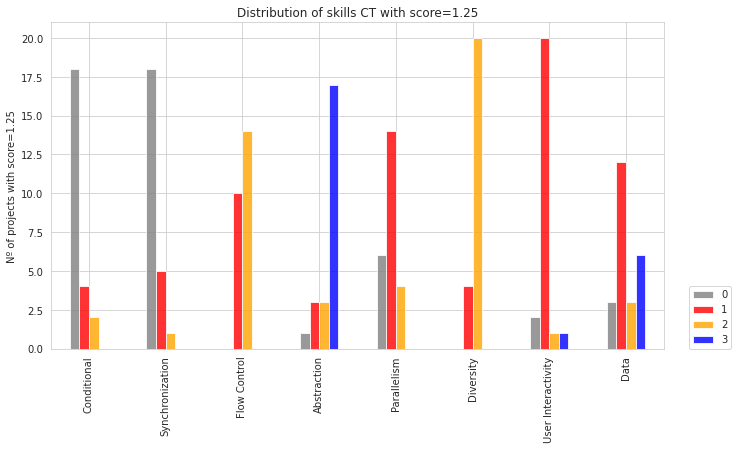

Matriz de correlación entre las 8 dimensiones para la puntuación 1.25


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
Conditional,1.000000,0.995183,-0.435890,-0.596330,0.194145,-0.377297,-0.113582,-0.346410
Synchronization,0.995183,1.000000,-0.452100,-0.587582,0.259617,-0.439355,-0.030131,-0.255996
Flow Control,-0.435890,-0.452100,1.000000,-0.456025,0.413585,0.865578,0.350773,0.198680
Abstraction,-0.596330,-0.587582,-0.456025,1.000000,-0.643192,-0.340899,-0.299102,0.063758
Parallelism,0.194145,0.259617,0.413585,-0.643192,1.000000,-0.047565,0.920823,0.720577
Diversity,-0.377297,-0.439355,0.865578,-0.340899,-0.047565,1.000000,-0.164823,-0.297044
User Interactivity,-0.113582,-0.030131,0.350773,-0.299102,0.920823,-0.164823,1.000000,0.933202
Data,-0.346410,-0.255996,0.198680,0.063758,0.720577,-0.297044,0.933202,1.000000


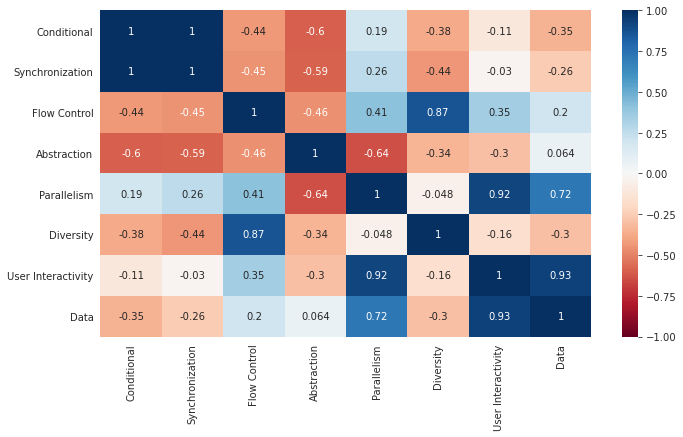

In [42]:
df_correlation_bar_chart(1.25, ct)

- Para  la puntuación media de 1.25: Los proyectos de Dr. Snap! incrementan sus puntuaciones con respecto a la puntuación anterior. La mayoría de ellos consiguen 2 puntos en diversidad y un punto en interactividad con el usuario.

  En la matriz de correlación se observa una correlación perfecta entre sincronismo y condicionales, y unas dependencias lineales muy elevadas entre diversidad y flujo de control, entre interactividad con el usuario y paralelismo, entre interactividad con el usuario y representación de los datos y paralelismo con representación de los datos. No existe correlación entre interactividad con el usuario y el uso de condicionales, entre interactividad con el usuario con sincronismo, entre abstracción y representación de los datos, ni entre diversidad y paralelismo. Hay una moderada dependencia lineal en sentido negativo entre abstracción y uso de condicionales, abstracción y sincronismo y entre abstracción y paralelismo (completar).

## Análisis estadístico general de las 8 dimensiones analizadas.

In [43]:
df_ct.describe()

,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,0.908451,0.838028,1.485915,2.443662,1.151408,1.964789,1.676056,1.707746
std,1.179357,1.093749,0.829968,0.973316,1.198482,0.610994,1.089943,1.034294
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000
50%,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


Text(0.5, 1.0, 'Correlation between 8 CT')

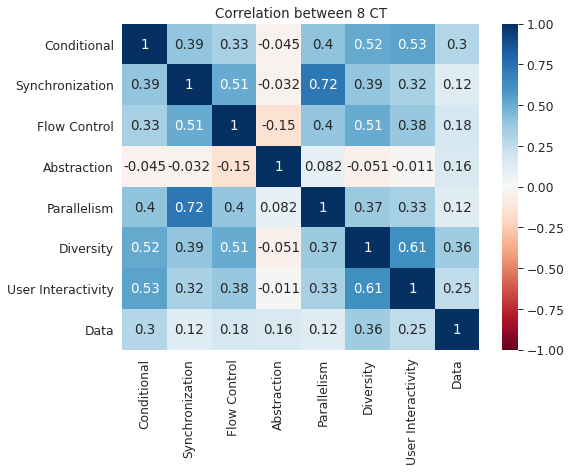

In [44]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
corr_matrix= df_ct.corr(method='pearson')
sns.heatmap(corr_matrix, annot= True, cmap='RdBu', vmin=-1, vmax=1)
plt.title("Correlation between 8 CT")

## Aprendizaje no supervisado: clustering k-means.

K Means es un algoritmo de aprendizaje no supervisado que divide el conjunto total de muestras en k grupos o clusters, minimizando la distancia intra-partición y maximizando la distancia inter-partición, de manera que los elementos del cluster son muy similares entre sí y difieren de otros clusters, creando grupos disjuntos.
Se necesita conocer de antemano el nº de clusters o K. 

In [45]:
X = np.array(df_ct)

In [46]:
X.shape

(284, 8)

Como en nuestro dataset no sabemos a priori el nº de clusters, se utilizan herramientas para poder estimarlo, como la curva de Elbow.
Se recorre un conjunto de posibles valores de k y se busca el punto en que un aumento en el valor de k no implique una disminución abrupta en el valor de la inercia o suma de las distancias euclídeas de cada punto asociado a un proyecto de Dr Snap! con respecto al centroide del cluster.

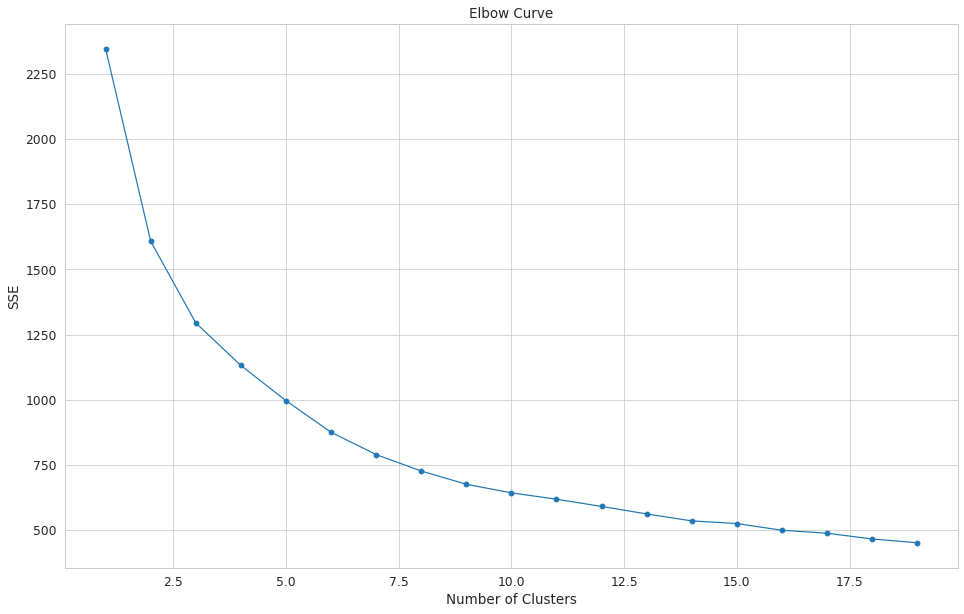

In [47]:
Nc= range(1, 20)
kmeans = [KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#print(score)
sse = [kmeans[i].inertia_ for i in range(len(kmeans))]
#print(sse)
plt.figure(figsize=(16, 10))
plt.plot(Nc, sse, marker= 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve')
plt.show();

Como no se aprecia un cambio abrupto en la pendiente con bajo valor de inercia o suma de error cuadrático medio entre los puntos del mismo cluster, se recurre al coeficiente de la silueta. En este caso, se mide la media de la distancia de separación entre los grupos y su rango de valores está entre -1 y 1, de modo que un valor cercano a 1 indica que el cluster tiene los puntos muy cercanos entre sí y separados de las muestras de los otros clusters. Tiene un alto coste computacional.

To n_clusters = 2 the Silhouette Coefficient is: 0.29243008767582085
To n_clusters = 3 the Silhouette Coefficient is: 0.2702356315447813
To n_clusters = 4 the Silhouette Coefficient is: 0.2721977823602504
To n_clusters = 5 the Silhouette Coefficient is: 0.28133870007099054
To n_clusters = 6 the Silhouette Coefficient is: 0.279641280195616
To n_clusters = 7 the Silhouette Coefficient is: 0.2889071378005233
To n_clusters = 8 the Silhouette Coefficient is: 0.30105234970199923
To n_clusters = 9 the Silhouette Coefficient is: 0.2998134419799814
To n_clusters = 10 the Silhouette Coefficient is: 0.3027057305673368
To n_clusters = 11 the Silhouette Coefficient is: 0.28383474352991506
To n_clusters = 12 the Silhouette Coefficient is: 0.29710556310237607
To n_clusters = 13 the Silhouette Coefficient is: 0.2982064781502274
To n_clusters = 14 the Silhouette Coefficient is: 0.29798702050007236
To n_clusters = 15 the Silhouette Coefficient is: 0.2897334517714935
To n_clusters = 16 the Silhouette Coe

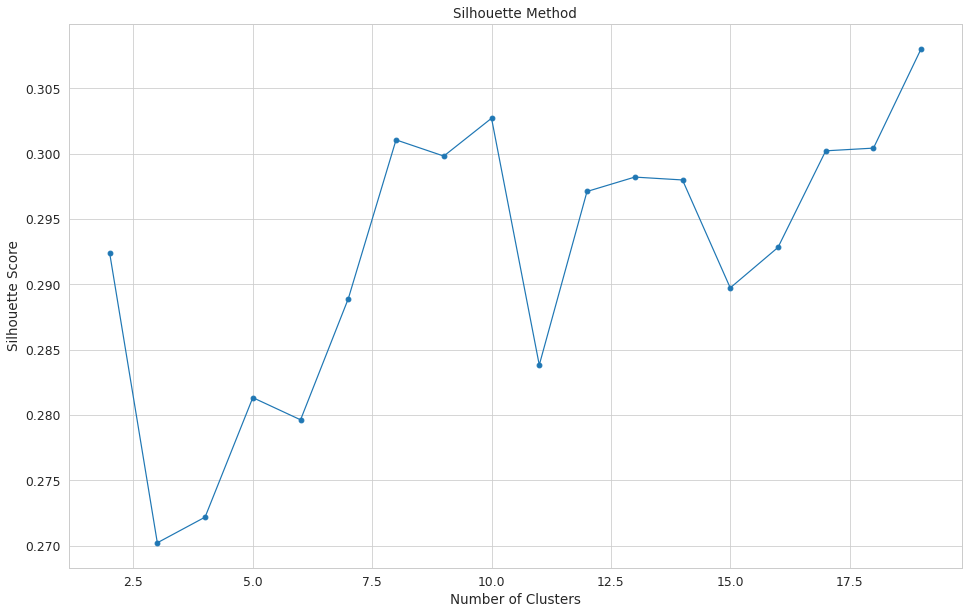

In [48]:
# distancia entre los puntos de datos de un clúster y los puntos de datos de otro clúster. El rango de puntuación de la silueta es de -1 a 1
K = range(2,20) 
from sklearn.metrics import silhouette_score
# El que sea mayor
silhouette_avg = []
for k in K:
    kmeans_sil = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
    silhouette = silhouette_score(X, kmeans_sil.labels_)
    print("To n_clusters =", k, "the Silhouette Coefficient is:", silhouette)
    silhouette_avg.append(silhouette)
plt.figure(figsize=(16, 10))
plt.plot(K, silhouette_avg, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show();

Tendría que producirse un máximo más claro sin que el nº de clusters sea muy elevado. Dos posibles valores son 8 y 10, aunque los valores están muy juntos, entre 0,27 y 0,308 para este rango de k. Se recurre a otros dos métricas de validación interna del clustering.
- Índice de Davies-Bouldin: Relación entre la distancia promedio entre cada punto del cluster con el centroide y la distancia entre los centroides de dos cluster, teniendo en cuenta el peor de los casos, que dichos centroides estén muy juntos y/o que el diámetro de estos clusters sea muy grande. Es una medida de similitud entre clusters diferentes e interesa que sea lo menor posible.
- Índice de Calinski-Harabasz: Es el criterio de relación de varianza, de modo que un valor elevado indica que los clusters son densos y están bien separados. Interesa por lo tanto un valor de pico.

,"Sum of squared error, Elbow",Silhouette Score,Davies Bouldin Score,Calinski Harabasz Score
2,1607.616880,0.292430,1.380305,129.574070
3,1294.645601,0.270236,1.481781,114.128422
4,1131.425322,0.272198,1.344119,100.216293
5,996.425903,0.281339,1.236117,94.490651
6,875.167998,0.279641,1.234503,93.461270
7,789.676174,0.288907,1.283128,91.003902
8,726.570194,0.301052,1.280810,87.896790
9,675.773001,0.299813,1.268916,84.975248
10,642.900849,0.302706,1.272370,80.663601
11,618.433168,0.283835,1.325415,76.274138


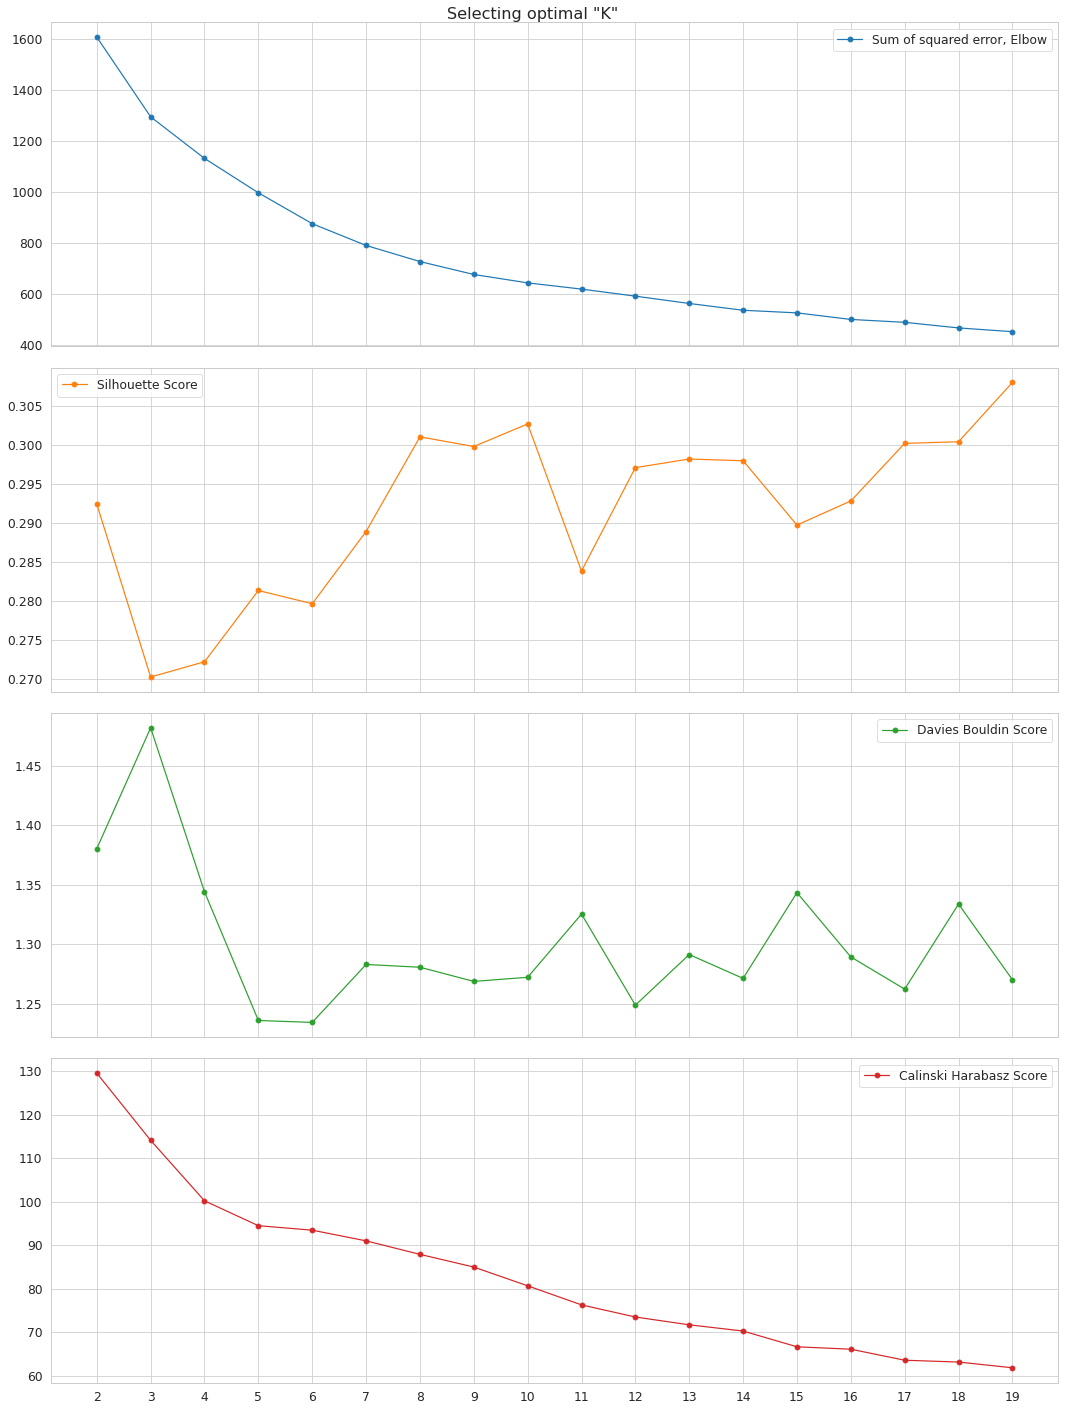

In [49]:
search_range = range(2, 20)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans4 = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
    inertia = kmeans4.inertia_ # varianza interna de los clusters
    temp_dict['Sum of squared error, Elbow'] = inertia
    cluster = kmeans4.predict(X)
    labels = kmeans4.labels_
    chs = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X,labels)
    ss = silhouette_score(X, labels)
    temp_dict['Silhouette Score'] = ss
    temp_dict['Davies Bouldin Score'] = db
    # more higher
    temp_dict['Calinski Harabasz Score'] = chs
    report[k] = temp_dict
report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 20), xticks=search_range, grid=True, title='Selecting optimal "K"', subplots=True,
               marker='o', sharex=True)
plt.tight_layout()
report_df

Según el índice de Davis Bouldin existe un mínimo entre 5 y 6 no muy pronunciado y según el índice de Calinski Harabasz no se produce un máximo evidente.

### Similitudes y diferencias entre clustering k-means con k=5 y k=8

Se colocan 5 centroides de manera aleatoria y se establece el nº máximo de veces que se ejecutará el algoritmo colocando diferentes centroides (10) y el nº máximo de iteraciones (300) para cada ejecución. Devolverá la posición de los centroides donde se minimice la distancia intra-cluster o varianza interna del cluster de los distintos puntos con respecto al centroide asignado. Las condiciones de parada son las iteraciones asignadas o cuando el valor del centroide converga en un determinado punto.

In [50]:
kmeans2 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
centroids = kmeans2.cluster_centers_
#kmeans2.predict(X) # To assign a new data point
labels = kmeans2.labels_
predicted = kmeans2.predict(X)
print(np.unique(kmeans2.labels_,return_counts=True))
print(centroids)

(array([0, 1, 2, 3, 4], dtype=int32), array([40, 66, 82, 59, 37]))
[[0.25       0.05       0.95       3.         0.35       1.575
  0.525      2.825     ]
 [1.3030303  0.27272727 1.48484848 2.75757576 0.6969697  2.28787879
  2.84848485 2.16666667]
 [1.74390244 2.34146341 2.04878049 2.47560976 2.68292683 2.31707317
  2.19512195 1.92682927]
 [0.08474576 0.15254237 1.         2.93220339 0.52542373 1.44067797
  0.6779661  0.44067797]
 [0.37837838 0.45945946 1.59459459 0.43243243 0.43243243 1.86486486
  1.27027027 1.21621622]]


Se calculan los 5 proyectos más cercanos a cada uno de los cinco centros ocentroides del cluster.

In [51]:
closest, _ = pairwise_distances_argmin_min(kmeans2.cluster_centers_, X)
closest

array([ 29, 170,  84, 152, 171])

In [52]:
df_cluster = df_ct[df_ct.index.isin(closest)][ct]

In [53]:
df_cluster["Average"] = df_cluster.mean(axis=1)
df_cluster = df_cluster.T[closest]

In [54]:
lista = [f"cluster {i}" for i in range(len(closest))]
zip_cluster = dict(zip(closest, lista))
df_cluster = df_cluster.rename(columns=zip_cluster)
df_cluster

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4
Conditional,0.000,2.00,1.000,0.000,0.000
Synchronization,0.000,0.00,3.000,0.000,0.000
Flow Control,1.000,1.00,2.000,1.000,1.000
Abstraction,3.000,3.00,2.000,3.000,0.000
Parallelism,0.000,1.00,3.000,0.000,0.000
Diversity,2.000,2.00,2.000,2.000,2.000
User Interactivity,0.000,3.00,2.000,1.000,1.000
Data,3.000,2.00,2.000,0.000,1.000
Average,1.125,1.75,2.125,0.875,0.625


Puntuaciones de los proyectos más representativos para el clustering con k=5

In [55]:
dicc_5_clusters = {i: np.where(kmeans2.labels_ == i)[0] for i in range(kmeans2.n_clusters)}
#dicc_5_clusters2 = {i: np.where(labels == i)[0] for i in range(kmeans2.n_clusters)}
dicc_5_clusters

{0: array([  5,  26,  29,  40,  43,  54,  59,  60,  61,  62,  70,  75,  78,
         80,  82,  87,  88, 104, 108, 114, 123, 140, 143, 149, 154, 160,
        167, 174, 192, 206, 208, 214, 218, 222, 245, 253, 254, 271, 274,
        275]),
 1: array([ 10,  13,  14,  15,  16,  17,  18,  19,  20,  28,  32,  36,  37,
         56,  66,  67,  71,  72,  79,  86,  96,  99, 119, 126, 129, 132,
        134, 138, 151, 156, 169, 170, 172, 173, 175, 178, 179, 181, 184,
        185, 186, 198, 199, 201, 202, 205, 212, 213, 215, 220, 223, 224,
        227, 229, 236, 237, 240, 243, 244, 250, 265, 266, 269, 270, 281,
        283]),
 2: array([  0,   2,   4,   6,   7,   9,  11,  12,  21,  23,  24,  25,  33,
         34,  38,  39,  41,  42,  44,  46,  47,  49,  50,  51,  53,  55,
         58,  64,  65,  68,  84,  85,  90,  93,  95,  97,  98, 101, 102,
        109, 112, 116, 118, 120, 121, 128, 131, 133, 135, 137, 142, 144,
        146, 153, 155, 158, 159, 162, 176, 177, 180, 183, 190, 193, 204,
        217,

Proyectos de Dr. Snap! que pertenecen a cada cluster con k=5.

Se repite el algoritmo k-means, esta vez asignando 8 como el nº de grupos en que segmentar el conjunto de datos o proyectos. Por convergencia se calcula la posición de los ocho centroides, que será el punto donde la distancia intra-cluster será menor. Con k=8 el valor de inertia o suma de los errores al cuadrado es menor, pero podríamos estar sobreajustando.

In [56]:
kmeans8 = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
centroids8 = kmeans8.cluster_centers_
#kmeans2.predict(X) # To assign a new data point
labels8 = kmeans8.labels_
predicted8 = kmeans8.predict(X)
print(np.unique(kmeans8.labels_,return_counts=True))
centroids8

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([33, 40, 38, 32, 54, 33, 38, 16]))


array([[0.15151515, 0.42424242, 1.81818182, 2.90909091, 0.63636364,
        2.33333333, 2.66666667, 2.09090909],
       [2.8       , 2.425     , 2.275     , 2.575     , 2.675     ,
        2.575     , 2.45      , 2.2       ],
       [0.26315789, 0.05263158, 0.89473684, 3.        , 0.36842105,
        1.55263158, 0.44736842, 2.81578947],
       [2.15625   , 0.1875    , 1.25      , 3.        , 0.78125   ,
        2.21875   , 2.90625   , 2.28125   ],
       [0.09259259, 0.11111111, 0.94444444, 2.98148148, 0.42592593,
        1.38888889, 0.61111111, 0.40740741],
       [0.09090909, 0.45454545, 1.57575758, 0.63636364, 0.63636364,
        1.81818182, 0.93939394, 1.09090909],
       [0.55263158, 2.28947368, 1.76315789, 2.52631579, 2.86842105,
        2.07894737, 1.94736842, 1.55263158],
       [2.0625    , 0.6875    , 1.6875    , 0.4375    , 0.4375    ,
        2.125     , 2.625     , 1.9375    ]])

In [57]:
dicc_8_clusters = {i: np.where(labels8 == i)[0] for i in range(kmeans8.n_clusters)}
dicc_8_clusters

{0: array([ 10,  13,  14,  15,  16,  17,  18,  19,  20,  32,  36,  53,  66,
         67,  72,  99, 129, 132, 134, 156, 166, 186, 205, 212, 229, 250,
        265, 266, 269, 270, 271, 274, 281]),
 1: array([  4,  23,  33,  42,  50,  51,  58,  85,  90,  95,  97, 102, 128,
        131, 133, 135, 137, 144, 146, 153, 155, 158, 159, 162, 176, 190,
        217, 219, 225, 226, 251, 252, 258, 261, 273, 277, 278, 279, 280,
        282]),
 2: array([  5,  26,  29,  40,  43,  54,  59,  60,  61,  62,  70,  75,  78,
         80,  82,  87,  88, 104, 108, 114, 123, 140, 143, 149, 154, 160,
        167, 174, 192, 206, 208, 214, 218, 222, 245, 253, 254, 275]),
 3: array([ 28,  37,  56,  71,  79,  86,  96, 119, 126, 138, 151, 169, 170,
        172, 175, 178, 179, 181, 184, 185, 201, 202, 213, 215, 220, 224,
        227, 236, 237, 240, 243, 244]),
 4: array([  1,  22,  27,  30,  31,  35,  48,  52,  57,  69,  73,  76,  77,
         81,  83,  89,  94, 100, 103, 106, 107, 110, 115, 117, 124, 127,
        130,

Proyectos de Dr. Snap! que pertenecen a cada cluster con k=8

In [58]:
closest8, _ = pairwise_distances_argmin_min(kmeans8.cluster_centers_, X)
closest8

array([ 67,  95,  29, 170, 152,   8,   9,  92])

In [59]:
df_cluster8 = df_ct[df_ct.index.isin(closest8)][ct]
df_cluster8["Average"] = df_cluster8.mean(axis=1)
df_cluster8 = df_cluster8.T[closest8]

In [60]:
lista = [f"cluster {i}" for i in range(len(closest8))]
zip_cluster = dict(zip(closest8, lista))
df_cluster8 = df_cluster8.rename(columns=zip_cluster)
df_cluster8

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
Conditional,0.0,3.000,0.000,2.00,0.000,0.0,1.0,2.000
Synchronization,0.0,2.000,0.000,0.00,0.000,0.0,2.0,1.000
Flow Control,2.0,2.000,1.000,1.00,1.000,2.0,2.0,2.000
Abstraction,3.0,2.000,3.000,3.00,3.000,1.0,3.0,0.000
Parallelism,1.0,3.000,0.000,1.00,0.000,1.0,3.0,0.000
Diversity,2.0,3.000,2.000,2.00,2.000,2.0,2.0,3.000
User Interactivity,2.0,2.000,0.000,3.00,1.000,1.0,2.0,3.000
Data,2.0,2.000,3.000,2.00,0.000,1.0,1.0,2.000
Average,1.5,2.375,1.125,1.75,0.875,1.0,2.0,1.625


Puntuaciones de los proyectos más representativos para el clustering con k=8

In [61]:
kmeans2.n_iter_

8

In [62]:
df_ct_labels = df_ct.copy()
df_ct_labels = pd.concat([df_ct_labels, pd.DataFrame(kmeans2.labels_, columns=["Labels_5"])], axis=1)
df_ct_labels = pd.concat([df_ct_labels, pd.DataFrame(kmeans8.labels_, columns=["Labels_8"])], axis=1)
df_ct_labels.sort_values(by=["Labels_5", "Labels_8"])

,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data,Labels_5,Labels_8
271,0,0,2,3,0,2,2,3,0,0
274,0,0,2,3,0,2,2,3,0,0
5,0,0,1,3,1,2,1,2,0,2
26,1,0,1,3,0,2,0,3,0,2
29,0,0,1,3,0,2,0,3,0,2
...,...,...,...,...,...,...,...,...,...,...
163,2,0,1,0,0,2,3,1,4,7
188,2,0,1,0,0,2,3,1,4,7
228,2,0,2,1,1,2,1,3,4,7
242,1,1,1,0,0,2,3,0,4,7


<AxesSubplot:xlabel='Labels_5', ylabel='Labels_8'>

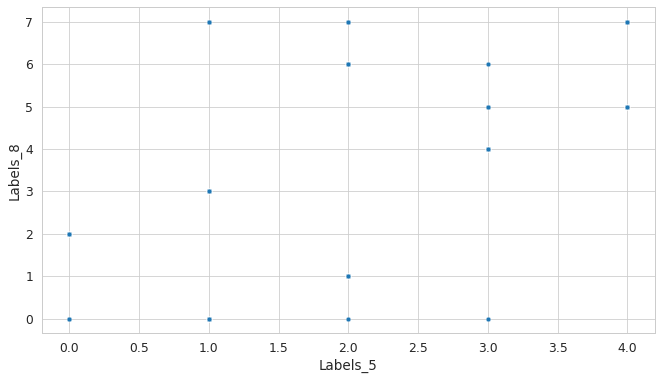

In [63]:
sns.scatterplot(x="Labels_5", y="Labels_8", data=df_ct_labels)

In [64]:
def get_df_similarity(df, k_i):
    df_cluster_k5 = df.loc[np.where(df.Labels_5 == k_i)]
    similarity = df_cluster_k5.groupby(["Labels_5", "Labels_8"]).size().reset_index(name='common_projects')
    den = (df_cluster_k5.Labels_5 == k_i).sum()
    similarity["similarity"] = similarity["common_projects"]/den
    return similarity
#get_df_similarity(df_ct_labels, 4)
frames = [get_df_similarity(df_ct_labels, k) for k in range(len(centroids))]
result = pd.concat(frames, ignore_index=True)
result

,Labels_5,Labels_8,common_projects,similarity
0,0,0,2,0.050000
1,0,2,38,0.950000
2,1,0,29,0.439394
3,1,3,32,0.484848
4,1,7,5,0.075758
5,2,0,1,0.012195
6,2,1,40,0.487805
7,2,6,37,0.451220
8,2,7,4,0.048780
9,3,0,1,0.016949


- El cluster 0 de la agrupación en 5 grupos (k = 5) coicide salvo en dos proyectos con el cluster 2 de la agrupación en 8 clusters. La agrupación correspondiente a la etiqueta 2 del clustering con k=8, se corresponde con el cluster 0 del clustering k-means con k=8 para el total de los proyectos.
- El cluster 1 de la agrupación en 5 cluster (k=5) se disgrega en tres grupos con el clustering en 8 clusters (k=8): el cluster 0, el cluster 3 y en menor proporción con el cluster 7.
- El cluster 2 de la agrupación con k=5 se divide en los cluster 0, 1, 6 y 7 del clustering con k=8, teniendo mayor semejanza o mayor nº de proyectos en común con los clusters 6 y 1.
- El cluster 3 del clustering con k=5 se disgrega en los clusters 0, 4, 5 y 6 del clustering con k=8, pero el más parecido es el cluster 4, con 54 proyectos coincidentes.
- El cluster 4 de la agrupación con k=5 se divide en los cluster 5 y 7 de la agrupación con k=8, siendo más similar al cluster 5, donde el 81,08% de los proyectos coinciden (30 proyectos).

Se observan a continuación semejanzas entre las dimensiones analizadas en los proyectos de Dr. Snap! para poder extraer conclusiones de por qué los clusters 1 y 2 con k=5 se disgregan principalmente en dos grupos en el clustering k=8.

In [65]:
df_cluster_1_k5 = df_ct_labels.loc[np.where(df_ct_labels.Labels_5 == 1)]
similarity = df_cluster_1_k5.groupby(["Labels_5", "Labels_8"]).size().reset_index(name='common_projects')
den = (df_cluster_1_k5.Labels_5 == 1).sum()
similarity["similarity"] = similarity["common_projects"]/den
similarity

,Labels_5,Labels_8,common_projects,similarity
0,1,0,29,0.439394
1,1,3,32,0.484848
2,1,7,5,0.075758


In [66]:
df_1_3 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 1) & (df_ct_labels.Labels_8 == 3))]

In [67]:
df_1_0 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 1) & (df_ct_labels.Labels_8 == 0))]

In [68]:
df_1_3.mean()

Conditional           2.15625
Synchronization       0.18750
Flow Control          1.25000
Abstraction           3.00000
Parallelism           0.78125
Diversity             2.21875
User Interactivity    2.90625
Data                  2.28125
Labels_5              1.00000
Labels_8              3.00000
dtype: float64

In [69]:
df_1_0.mean()

Conditional           0.137931
Synchronization       0.413793
Flow Control          1.793103
Abstraction           2.896552
Parallelism           0.655172
Diversity             2.379310
User Interactivity    2.758621
Data                  2.068966
Labels_5              1.000000
Labels_8              0.000000
dtype: float64

El cluster 1 de k=5 se ha disgregado en los cluster 0 y 3 del clustering k=8 principalmente por la diferencia existente en las puntuaciones del uso de condicionales y en menor medida por las diferencias en puntuación de control de flujo entre dichos clusters 0 y 3.

In [70]:
df_2_1 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 2) & (df_ct_labels.Labels_8 == 1))]
df_2_1.mean()

Conditional           2.800
Synchronization       2.425
Flow Control          2.275
Abstraction           2.575
Parallelism           2.675
Diversity             2.575
User Interactivity    2.450
Data                  2.200
Labels_5              2.000
Labels_8              1.000
dtype: float64

In [71]:
df_2_6 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 2) & (df_ct_labels.Labels_8 == 6))]
df_2_6.mean()

Conditional           0.567568
Synchronization       2.297297
Flow Control          1.756757
Abstraction           2.513514
Parallelism           2.918919
Diversity             2.081081
User Interactivity    1.972973
Data                  1.567568
Labels_5              2.000000
Labels_8              6.000000
dtype: float64

El cluster 2 de k=5 se ha dividido en los clusters 1 y 6 de la agrupación k means con k=8 por las diferencias existentes entre ambos grupos en el uso de condicionales y, en menor medida, por las diferencias que se producen en flujo de control y diversidad.

Si el uso de condicionales es un factor determinante y distintivo para segmentar en grupos es mejor el clustering con k=8.

In [72]:
df_ct_labels.loc[np.where(df_ct_labels.Labels_8 == 7)]

,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data,Labels_5,Labels_8
44,2,2,3,1,1,2,3,2,2,7
92,2,1,2,0,0,3,3,2,4,7
101,3,2,2,1,1,2,1,3,2,7
111,0,1,2,0,0,2,3,3,4,7
163,2,0,1,0,0,2,3,1,4,7
173,2,0,1,0,0,2,3,3,1,7
188,2,0,1,0,0,2,3,1,4,7
198,3,0,1,0,0,2,3,2,1,7
199,2,0,2,1,1,3,3,1,1,7
204,2,2,2,1,1,2,2,2,2,7


In [73]:
df_1_7 = df_ct_labels.loc[np.where((df_ct_labels.Labels_8 == 7) & (df_ct_labels.Labels_5 == 1))]
print(df_1_7.mean())
df_1_7

Conditional           2.6
Synchronization       0.0
Flow Control          1.2
Abstraction           0.4
Parallelism           0.4
Diversity             2.2
User Interactivity    3.0
Data                  2.0
Labels_5              1.0
Labels_8              7.0
dtype: float64


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data,Labels_5,Labels_8
173,2,0,1,0,0,2,3,3,1,7
198,3,0,1,0,0,2,3,2,1,7
199,2,0,2,1,1,3,3,1,1,7
223,3,0,1,1,1,2,3,2,1,7
283,3,0,1,0,0,2,3,2,1,7


In [74]:
df_2_7 = df_ct_labels.loc[np.where((df_ct_labels.Labels_8 == 7) & (df_ct_labels.Labels_5 == 2))]
print(df_2_7.mean())
df_2_7

Conditional           2.25
Synchronization       2.00
Flow Control          2.25
Abstraction           1.00
Parallelism           1.00
Diversity             2.00
User Interactivity    2.00
Data                  2.25
Labels_5              2.00
Labels_8              7.00
dtype: float64


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data,Labels_5,Labels_8
44,2,2,3,1,1,2,3,2,2,7
101,3,2,2,1,1,2,1,3,2,7
204,2,2,2,1,1,2,2,2,2,7
246,2,2,2,1,1,2,2,2,2,7


In [75]:
df_4_7 = df_ct_labels.loc[np.where((df_ct_labels.Labels_8 == 7) & (df_ct_labels.Labels_5 == 4))]
print(df_4_7.mean())
df_4_7

Conditional           1.571429
Synchronization       0.428571
Flow Control          1.714286
Abstraction           0.142857
Parallelism           0.142857
Diversity             2.142857
User Interactivity    2.714286
Data                  1.714286
Labels_5              4.000000
Labels_8              7.000000
dtype: float64


,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data,Labels_5,Labels_8
92,2,1,2,0,0,3,3,2,4,7
111,0,1,2,0,0,2,3,3,4,7
163,2,0,1,0,0,2,3,1,4,7
188,2,0,1,0,0,2,3,1,4,7
228,2,0,2,1,1,2,1,3,4,7
242,1,1,1,0,0,2,3,0,4,7
268,2,0,3,0,0,2,3,2,4,7


En el cluster 7 de la agrupación de k=8 se han juntado los distintos proyectos, por la similitud en los valores de diversidad que presentan los proyectos en los clusters 1, 2 y 4 del clustering k means con k=5, como se aprecia tanto en la media como en los valores que toman las dimensiones en los proyectos de cada grupo.

In [76]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    print(distances)
    return distances.index(max(distances)) + 2
print(inertia)
n = optimal_number_of_clusters(score)
n

451.3574692806185
[3.119611240373707e-15, 6.016391179293554, 7.98922427566738, 8.539632998868843, 8.821983161368998, 8.973808221010305, 8.785905691942341, 8.385369060330667, 7.867916226210801, 7.180200655762201, 6.412654409975344, 5.675684842605676, 4.9483914491392325, 4.202135824111674, 3.298973579822803, 2.5438244101002625, 1.6518002653605495, 0.8603230535937095, 7.199102862400862e-16]


7

## Análisis de clustering entre niveles o puntuaciones totales.


Se realiza sobre el grupo de cada puntuación media un clustering K medias. Se consigue el proyecto más representativo para cada puntuación. Se obtiene un dataframe que recoge todos los proyectos de Dr Snap! más representativos para cada puntuación.

In [77]:
def get_df_representative(df, n):
    df_n1 = df_total_group.get_group(n).loc[:, "Conditional":"Data"]
    kmeans_n1 = KMeans(n_clusters=1).fit(df_n1)
    center_n1 = kmeans_n1.cluster_centers_
    closest_n1, _ = pairwise_distances_argmin_min(kmeans_n1.cluster_centers_, df_n1)    
    df_n1_representative = df_n1.iloc[closest_n1]
    return df_n1_representative
#get_df_representative(df_total_group, 0.5)
frames = [get_df_representative(df_total_group, n) for n in total_average]
dataframe_by_avg = pd.concat(frames)
dataframe_by_avg

,Conditional,Synchronization,Flow Control,Abstraction,Parallelism,Diversity,User Interactivity,Data
125,0,0,0,0,0,1,0,0
209,0,0,1,0,0,1,1,0
35,0,0,0,3,0,1,0,0
171,0,0,1,0,0,2,1,1
216,0,0,1,2,0,2,0,1
54,0,0,0,3,0,1,0,3
1,0,0,1,3,0,2,1,1
76,0,0,2,3,0,2,1,1
100,0,0,2,3,1,2,1,1
269,0,0,2,3,0,2,2,2


Gracias al clustering y al proyecto más representativo para cada puntuación, se puede observar la ruta de aprendizaje para cada dimensión considerada en el análisis de los proyectos de Dr. Snap! Se representa en función de la puntuación total en vez de en función de la puntuación media, para que sea más evidente la evolución.

Text(0, 0.5, 'Total score')

<Figure size 1152x720 with 0 Axes>

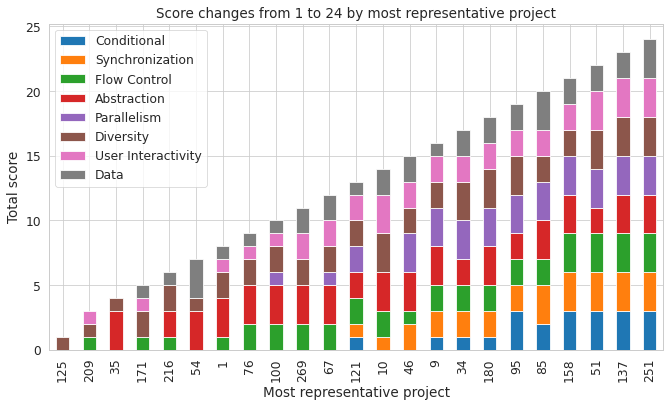

In [78]:
plt.figure(figsize=(16, 10))
dataframe_by_avg.plot(kind="bar", stacked=True)
plt.title("Score changes from 1 to 24 by most representative project")
plt.xlabel("Most representative project")
plt.ylabel("Total score")

- Cambio de nivel entre 1 y 3: debido a que no hay proyectos en la muestra de 0 y 2 puntos totales. Control de flujo e interactividad con el usuario valen 1 punto. Diversidad se mantiene en 1 punto.
- Cambio de nivel entre 3 y 4: Diversidad se mantiene en un punto. Control de flujo e interactividad con el usuario pasan a valer 0 puntos, mientras abstracción sube abruptamente de 0 a 3 puntos.
- Cambio de nivel entre 4 y 5 puntos: Abstracción vuelve a los 0 puntos. Control de flujo, interactividad con el usuario y representación de los datos consiguen 1 punto. Diversidad sube su puntuación de 1 a 2 puntos.
- Cambio de nivel entre 5 y 6 puntos: Interactividad del usuario vuelve a los 0 puntos, en cambio, en abstracción se consiguen 2 puntos.
- Cambio de nivel entre 6 y 7 puntos: Abstracción pasa a valer de 2 a 3 puntos. Diversidad disminuye su puntuación de 2 a 1 punto. Representación de los datos pasa a valer de 1 a 3 puntos.
- Cambio de nivel entre 7 y 8 puntos: Control de flujo aumenta su puntuación a 1 punto. Diversidad pasa de 1 punto a 2 puntos. Interactividad con el usuario consigue 1 punto y representación de los datos disminuye su valor de 3 a 1 punto.
- Cambio de nivel entre 8 y 9 puntos: Control de flujo incrementa su puntuación de 1 a 2 puntos.
- Cambio de nivel entre 9 y 10 puntos: Paralelismo consigue 1 punto.
- Cambio de nivel entre 10 y 11 puntos: Tanto interactividad con el usuario como representación de los datos consiguen aumentar su puntuación de 1 a 2 puntos. Paralelismo disminuye su puntuación de 1 a 0 puntos. 
- Cambio de nivel entre 11 y 12 puntos: Paralelismo vuelve a conseguir 1 punto.
- Cambio de nivel entre 12 y 13 puntos: Representación de los datos y abstracción bajan 1 punto, de modo que ahora valen 1 punto y 2 puntos, respectivamente. Paralelismo alcanza  los 2 puntos. Tanto en sincronismo como en el uso de condicionales se consigue 1 punto. 
- Cambio de nivel entre 13 y 14 puntos: Tanto el uso de condicionales como paralelismo dejan de puntuar. Abstracción, diversidad e interactividad con el usuario incrementan su valor de 2 a 3 puntos.
- Cambio de nivel entre 14 y 15 puntos: Sincronismo incrementa su valor de 1 a 2 puntos. Interactividad con el usuario y diversidad disminuyen su puntuación, obteniendo 2 puntos. Control de flujo también se decrementa, valiendo en este caso 1 punto. Paralelismo consigue pasar de 0 a 3 puntos.
- Cambio de nivel entre 15 y 16 puntos: El uso de condidionales consigue 1 punto. Flujo de control pasa de 1 a 2 puntos. Representación de los datos disminuye de 2 a 1 punto.
- Cambio entre 16 y 17 puntos: Abstracción disminuye de 3 a 2 puntos. Diversidad pasa de 2 a 3 puntos. Representación de los datos también aumenta de 1 a 2 puntos.
- Cambio entre 17 y 18 puntos: Abstracción vuelve a subir de 2 a 3 puntos.
- Cambio entre 18 y 19 puntos: El uso de condicionales incrementa su puntuación de 1 a 3 puntos. Abstracción disminuye de 3 a 2 puntos.
- Cambio entre 19 y 20 puntos: El uso de condicionales y diversidad disminuyen de 3 a 2 puntos, mientras que sincronismo aumenta su valor de 2 a 3 puntos. Abstracción y representación de los datos se incrementan alcanzando la máxima puntuación.
- Cambio entre 20 y 21 puntos: El uso de condicionales y control de flujo aumentan su valor de 2 a 3 puntos. Representación de los datos disminuye al obtener 2 puntos en vez de los 3 que tenía para la puntuación total de 20 puntos.
- Cambio entre 21 y 22 puntos: Diversidad e interactividad con el usuario se incrementan en 1 punto y consiguen los 3 puntos. Abstracción vuelve a disminuir, valiendo en este caso 2 puntos.
- Cambio entre 22 y 23 puntos: Abstracción consigue la máxima puntuación, que es de 3 puntos.
- Cambio entre 23 y 24 puntos: Representación de los datos incrementa su puntuación y obtiene 3 puntos.